In [1]:
# Imports for NumPy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Notebook magic to inline plots
%matplotlib inline
# Store matplotlib plots as both png and pdf --> for 
# better quality graphics when exporting the notebook
# to pdf.
from IPython.display import set_matplotlib_formats
from IPython.display import Image, Video
set_matplotlib_formats('png', 'pdf')
# Load seaborn defaults
sns.set(rc={'figure.dpi':300, 'font.weight':'bold'})
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.2)

In [3]:
from scipy.stats import norm, rv_histogram, lognorm

In [4]:
from scipy.optimize import minimize

In [5]:
def unimodal(param):
    mu, sigma = param[0], param[1]
    dist = norm(loc=mu, scale=sigma)
    frequency = dist.pdf(centers) * bw * 100
    return frequency

In [6]:
def unimodal_ln(param):
    mu, sigma, shift = param[0], param[1], param[2]
    dist = lognorm(s = sigma, scale=np.exp(mu), loc = shift)
    frequency = dist.pdf(centers) * bw * 100
    return frequency

In [7]:
def bimodal(param):
    A1, mu1, sigma1 = param[0], param[1], param[2]
    A2, mu2, sigma2 = param[3], param[4], param[5]
    if (param < 0).any():
        return np.inf
    dist1 = norm(loc=mu1, scale=sigma1)
    dist2 = norm(loc=mu2, scale=sigma2)
    frequency = (A1 * dist1.pdf(centers) + A2 * dist2.pdf(centers)) * bw * 100
    return frequency

In [8]:
def bimodal_ln(param):
    A1, mu1, sigma1, shift = param[0], param[1], param[2], param[3]
    A2, mu2, sigma2 = param[4], param[5], param[6]
    dist1 = lognorm(sigma1, scale=np.exp(mu1), loc=shift)
    dist2 = norm(loc=mu2, scale=sigma2)
    frequency = (A1 * dist1.pdf(centers) + A2 * dist2.pdf(centers)) * bw * 100
    return frequency

In [9]:
def bimodal_100(param):
    mu1, sigma1, shift = param[0], param[1], param[2]
    A2, mu2, sigma2 = param[3], param[4], param[5]
    dist1 = lognorm(sigma1, scale=np.exp(mu1), loc=shift)
    dist2 = norm(loc=mu2, scale=sigma2)
    frequency = (dist1.pdf(centers) + A2 * dist2.pdf(centers)) * bw * 100
    return frequency

In [10]:
def cost_unimodal(params):
    return np.sum((unimodal(params) - freq)**2)

In [11]:
def cost_unimodal_ln(params):
    if (params <= 0).any():
        return np.inf
    return np.sum((unimodal_ln(params) - freq)**2)

In [12]:
def cost_bimodal(params):
    return np.sum((bimodal(params) - freq)**2)

In [13]:
def cost_bimodal_ln(params):
    if (params <= 0).any():
        return np.inf
    return np.sum((bimodal_ln(params) - freq)**2)

In [14]:
def cost_bimodal_100(params):
    if (params <= 0).any():
        return np.inf
    #if params[5] < 75:
    #    return np.inf
    return np.sum((bimodal_100(params) - freq)**2)

# 5 nm

In [15]:
# Load the data
dist = pd.read_csv('5nm_distribution_moreparticles.csv')
dist.head()

,size,initial,laser_low,laser_high
0,0.2,0.000000,0.000000,0.000000
1,0.4,2.393617,0.000000,0.000000
2,0.6,0.265957,0.000000,9.562842
3,0.8,0.000000,4.582651,15.300546
4,1.0,0.265957,5.073650,5.464481


In [16]:
# Get the histogram bin centers
centers = dist['size'].to_numpy()
centers

array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2,
       13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4,
       15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6,
       17.8, 18. , 18.2, 18.4])

In [17]:
# Histogram bin width
bw = centers[1] - centers[0]
bw

0.2

In [18]:
# Create the corresponding edges for the histogram
edges = np.linspace(centers[0] - 0.5*bw, centers[-1] + 0.5*bw, len(centers)+1, endpoint=True)
edges

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9,
       11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1,
       13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9, 15.1, 15.3,
       15.5, 15.7, 15.9, 16.1, 16.3, 16.5, 16.7, 16.9, 17.1, 17.3, 17.5,
       17.7, 17.9, 18.1, 18.3, 18.5])

In [19]:
freq = dist['initial']

In [20]:
# The initial guess of parameters for Nelder-Mead
# E, gamma
initial_guess = np.array([5, 0.6]) 

In [21]:
# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_unimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

50.293722439210754 [5.57140174 0.55862112]


In [22]:
mu, sigma = fit_parms[0], fit_parms[1]

In [23]:
dist_initial = norm(loc=mu, scale=sigma)

Text(0.5, 1.0, '$N=376$')

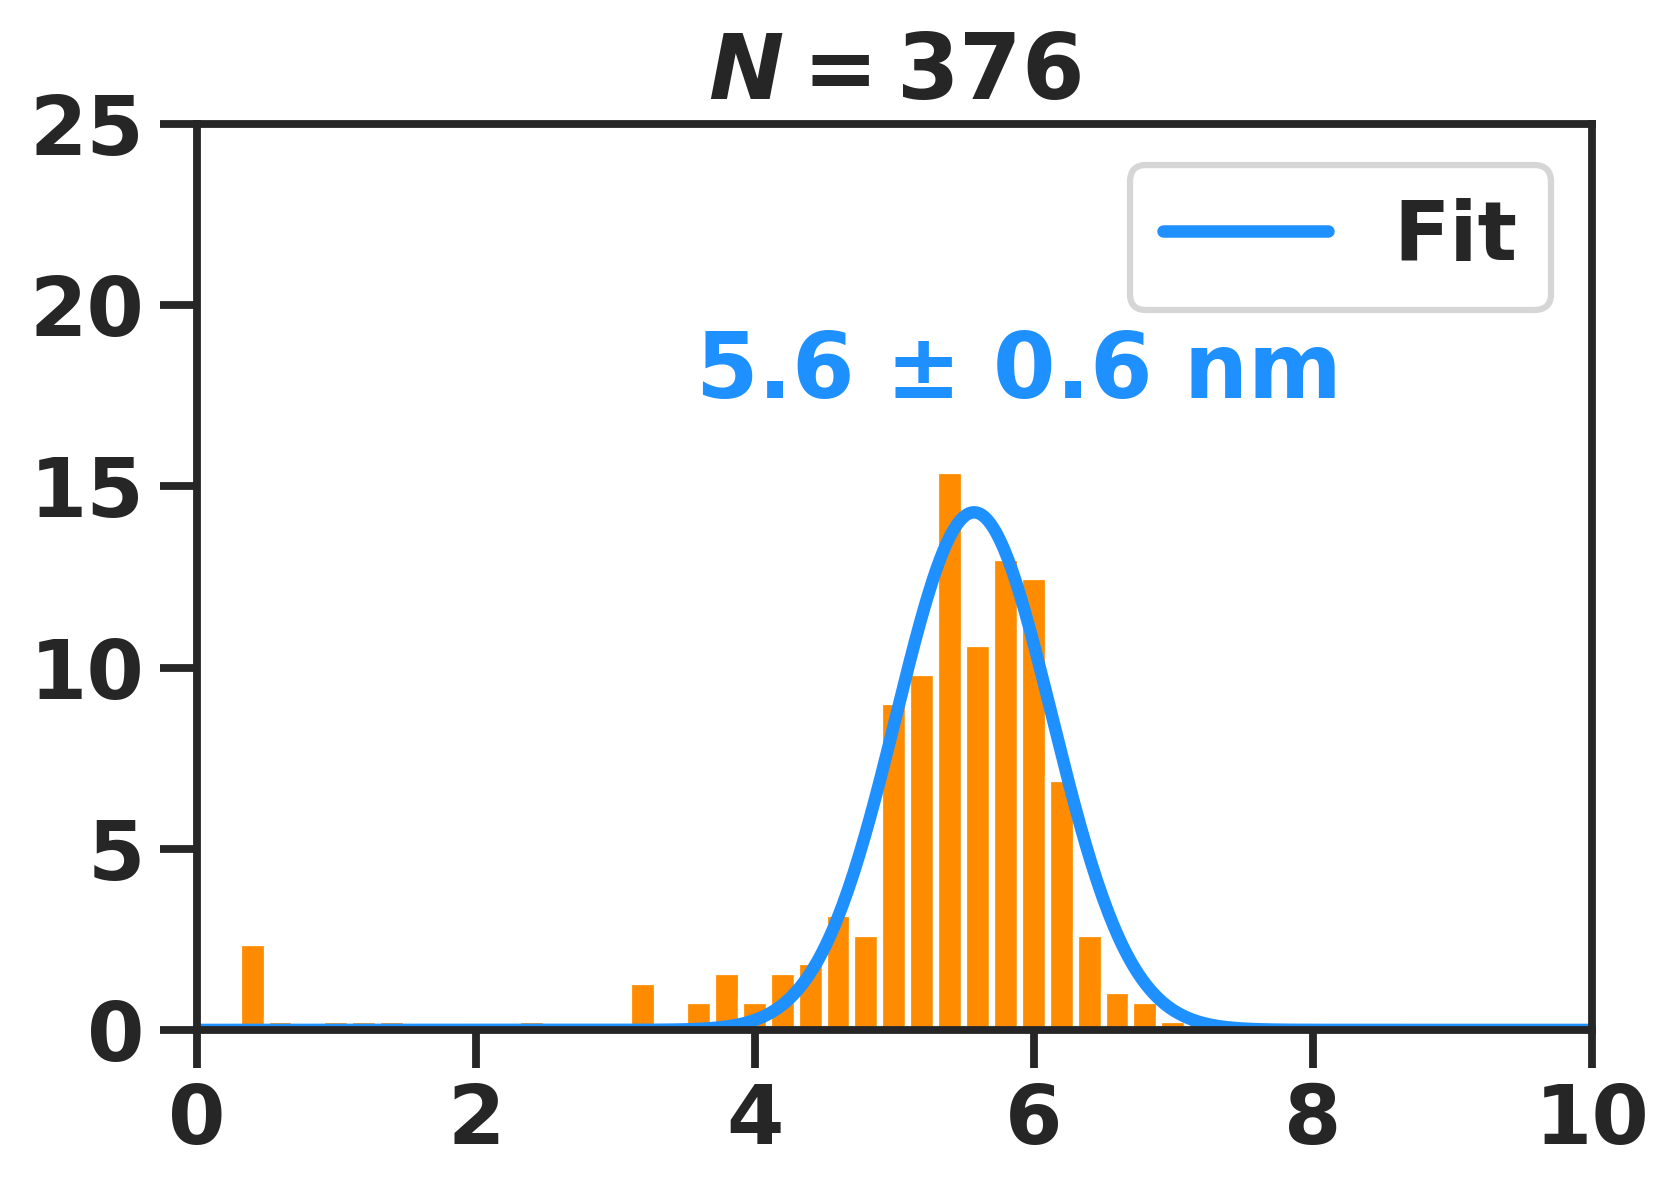

In [24]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
np.savetxt('5nm_distfit_initial_x.txt', x)
np.savetxt('5nm_distfit_initial_y.txt', y)
#samples = dist_initial.rvs(1000)
gz = dist['initial'] > 0
plt.hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=3)
#plt.hist(samples, density=True)
plt.xlim((0,10))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,25))
#plt.text(0.5, 20, "$\mu$ $\pm$ $\sigma$: \n{:.1f} $\pm$ {:.1f} nm".format(mu, sigma))
plt.text(mu-2, dist['initial'].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=376$")

Text(0.5, 1.0, '$N=376$')

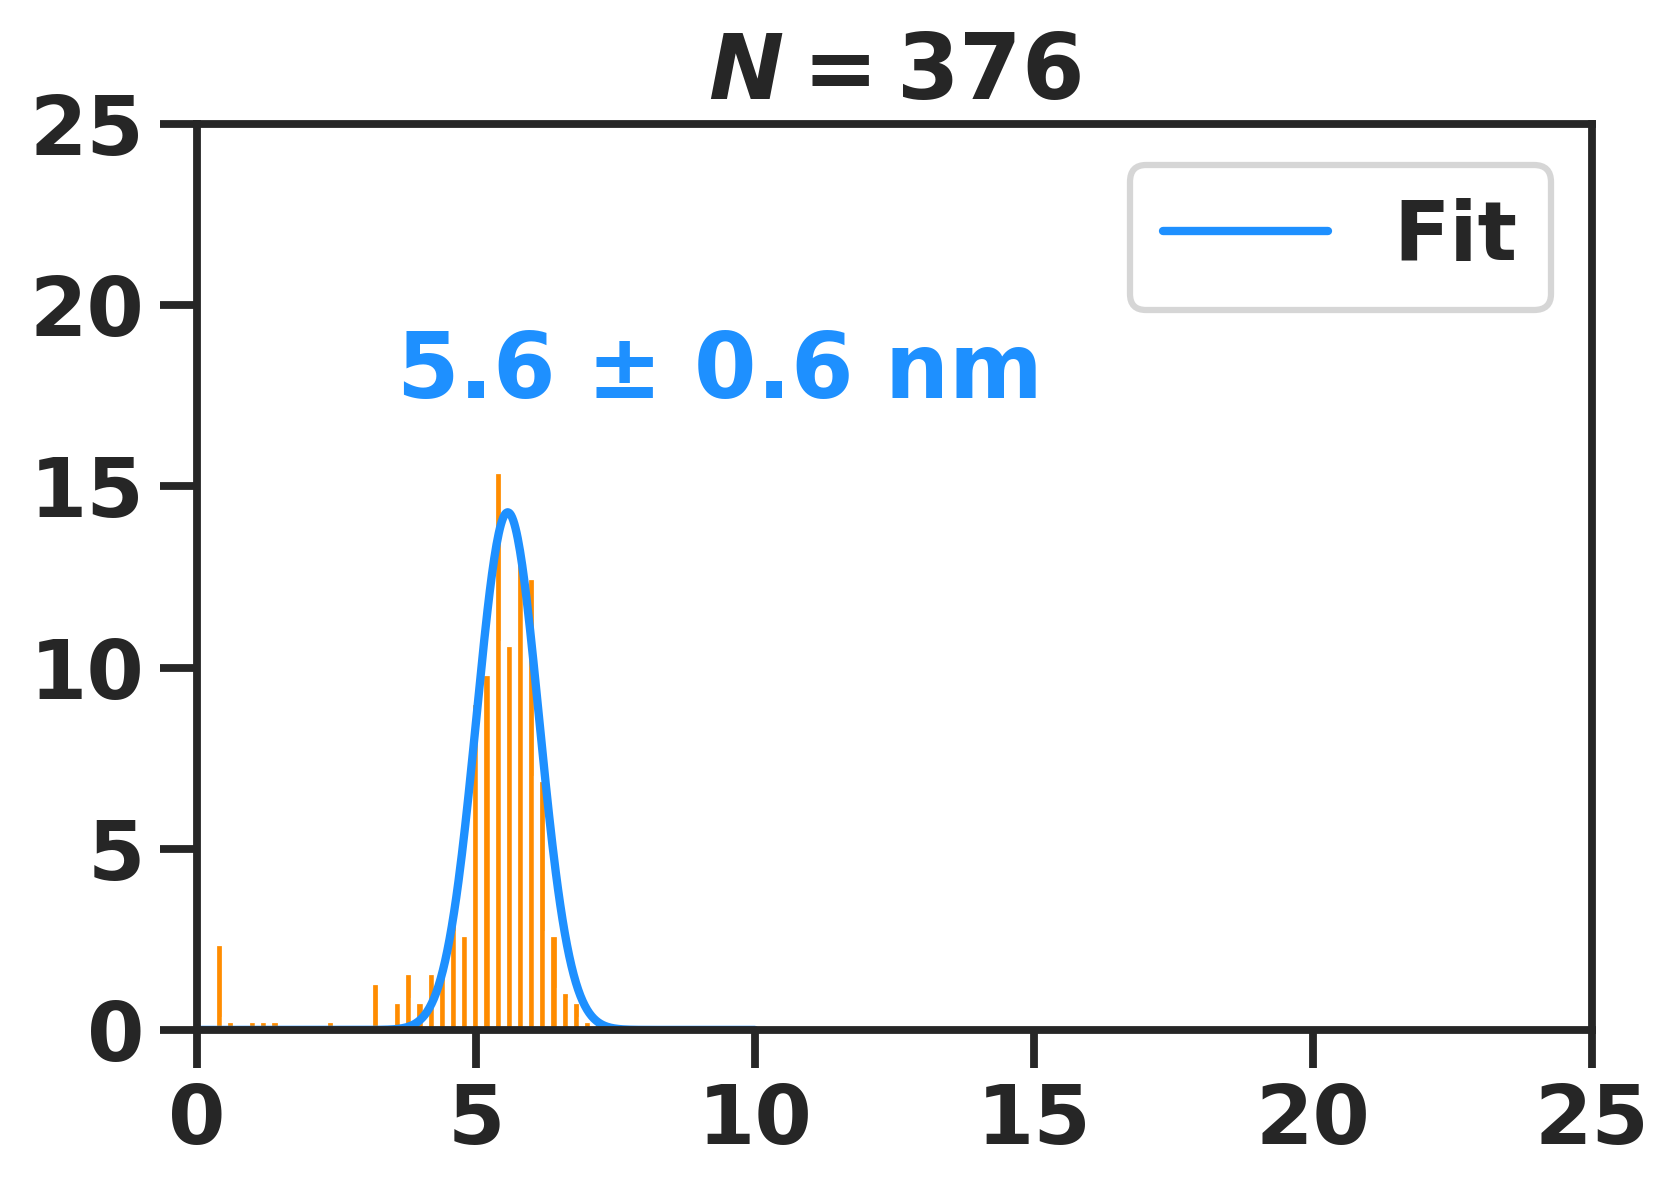

In [25]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None, rwidth=10)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
#plt.hist(samples, density=True)
plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,25))
#plt.text(0.5, 20, "$\mu$ $\pm$ $\sigma$: \n{:.1f} $\pm$ {:.1f} nm".format(mu, sigma))
plt.text(mu-2, dist['initial'].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=376$")

In [26]:
freq = dist['laser_low']

In [27]:
# The initial guess of parameters for Nelder-Mead
# E, gamma
initial_guess = np.array([1, 3, 0.5, 1, 5, 0.5]) 

In [28]:
# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_bimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

30.656600864685114 [0.45051429 1.45045058 0.56857542 0.53413124 6.00015242 0.67683795]


In [29]:
a1_low, mu1, sigma1 = fit_parms[0], fit_parms[1], fit_parms[2]

In [30]:
a2_low, mu2, sigma2 = fit_parms[3], fit_parms[4], fit_parms[5]

In [31]:
dist_1_low = norm(loc=mu1, scale=sigma1)
dist_2_low = norm(loc=mu2, scale=sigma2)

Text(0.5, 1.0, '$N=611$')

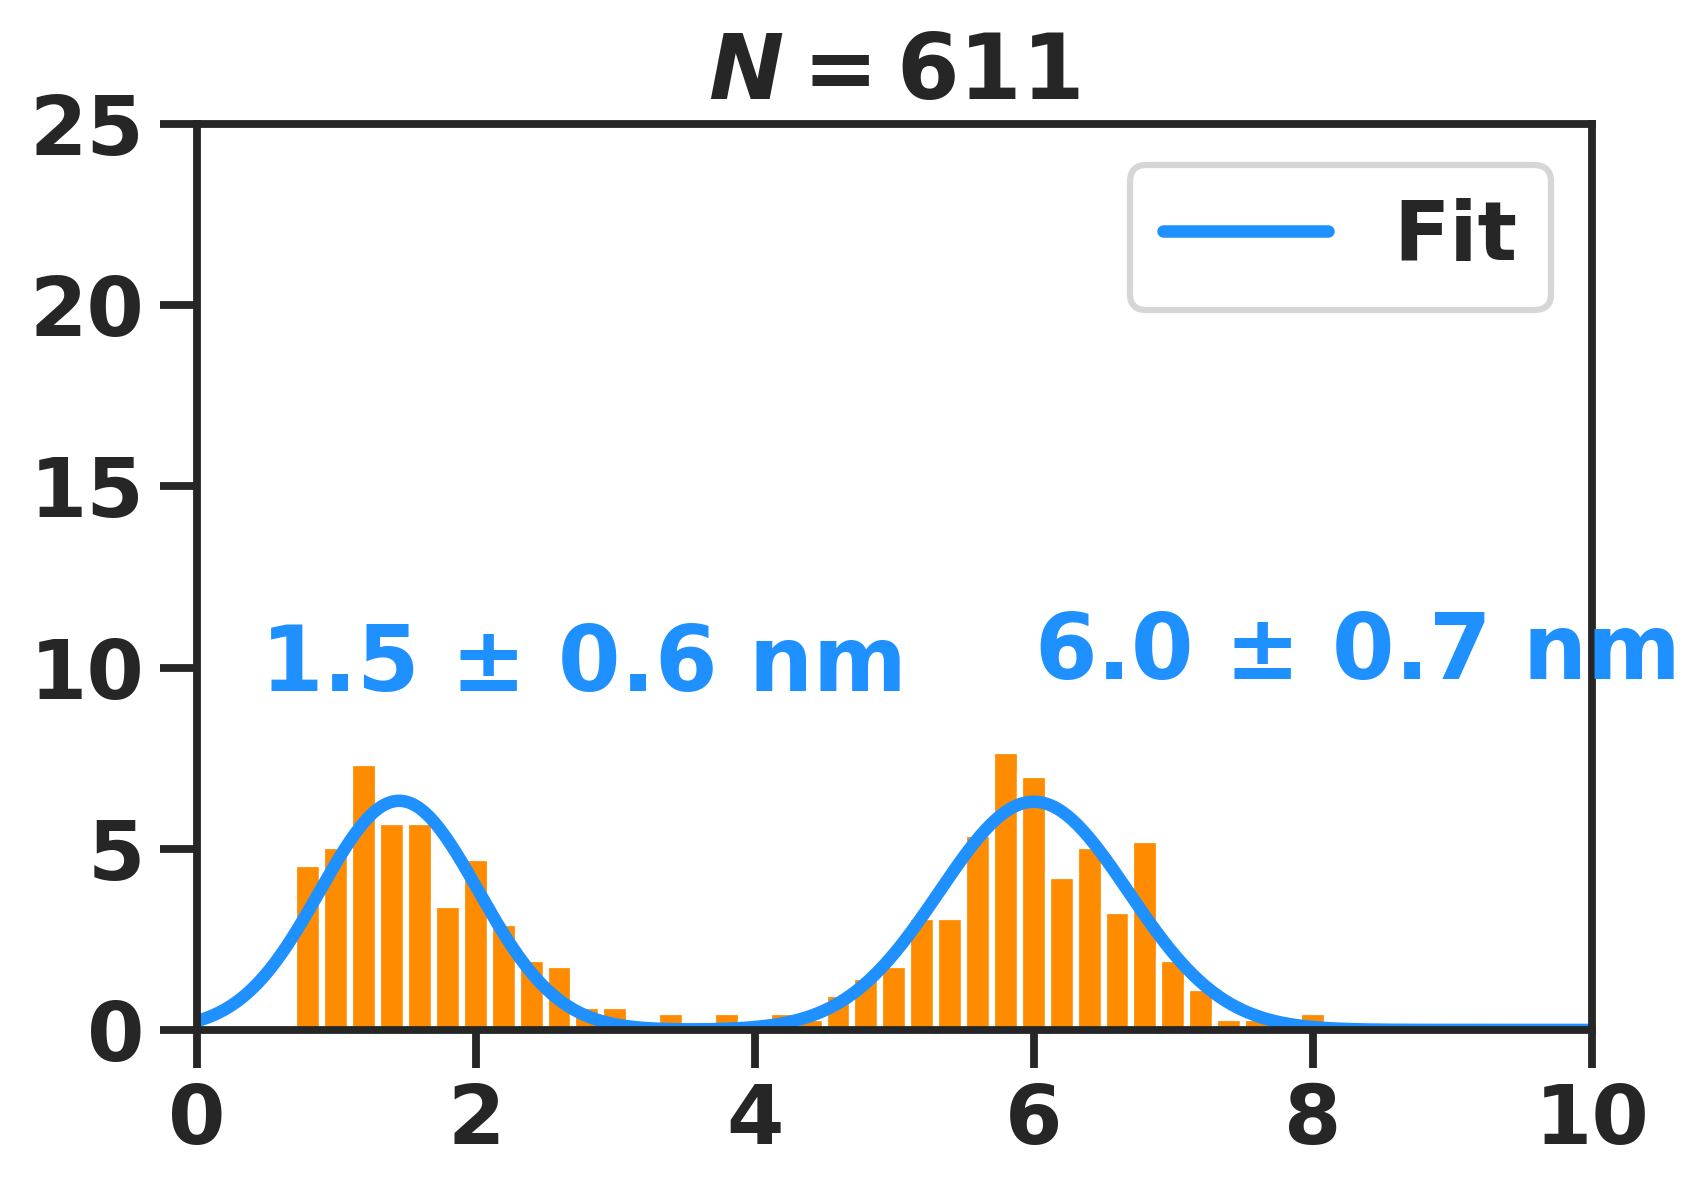

In [32]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_low*dist_1_low.pdf(x) + a2_low*dist_2_low.pdf(x)) * (edges[1]-edges[0]) * 100
np.savetxt('5nm_distfit_laser-low_x.txt', x)
np.savetxt('5nm_distfit_laser-low_y.txt', y)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linewidth=3)
#plt.hist(samples, density=True)
plt.xlim((0,10))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,25))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1-1, dist['laser_low'][centers < 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2, dist['laser_low'][centers > 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=611$")

Text(0.5, 1.0, '$N=611$')

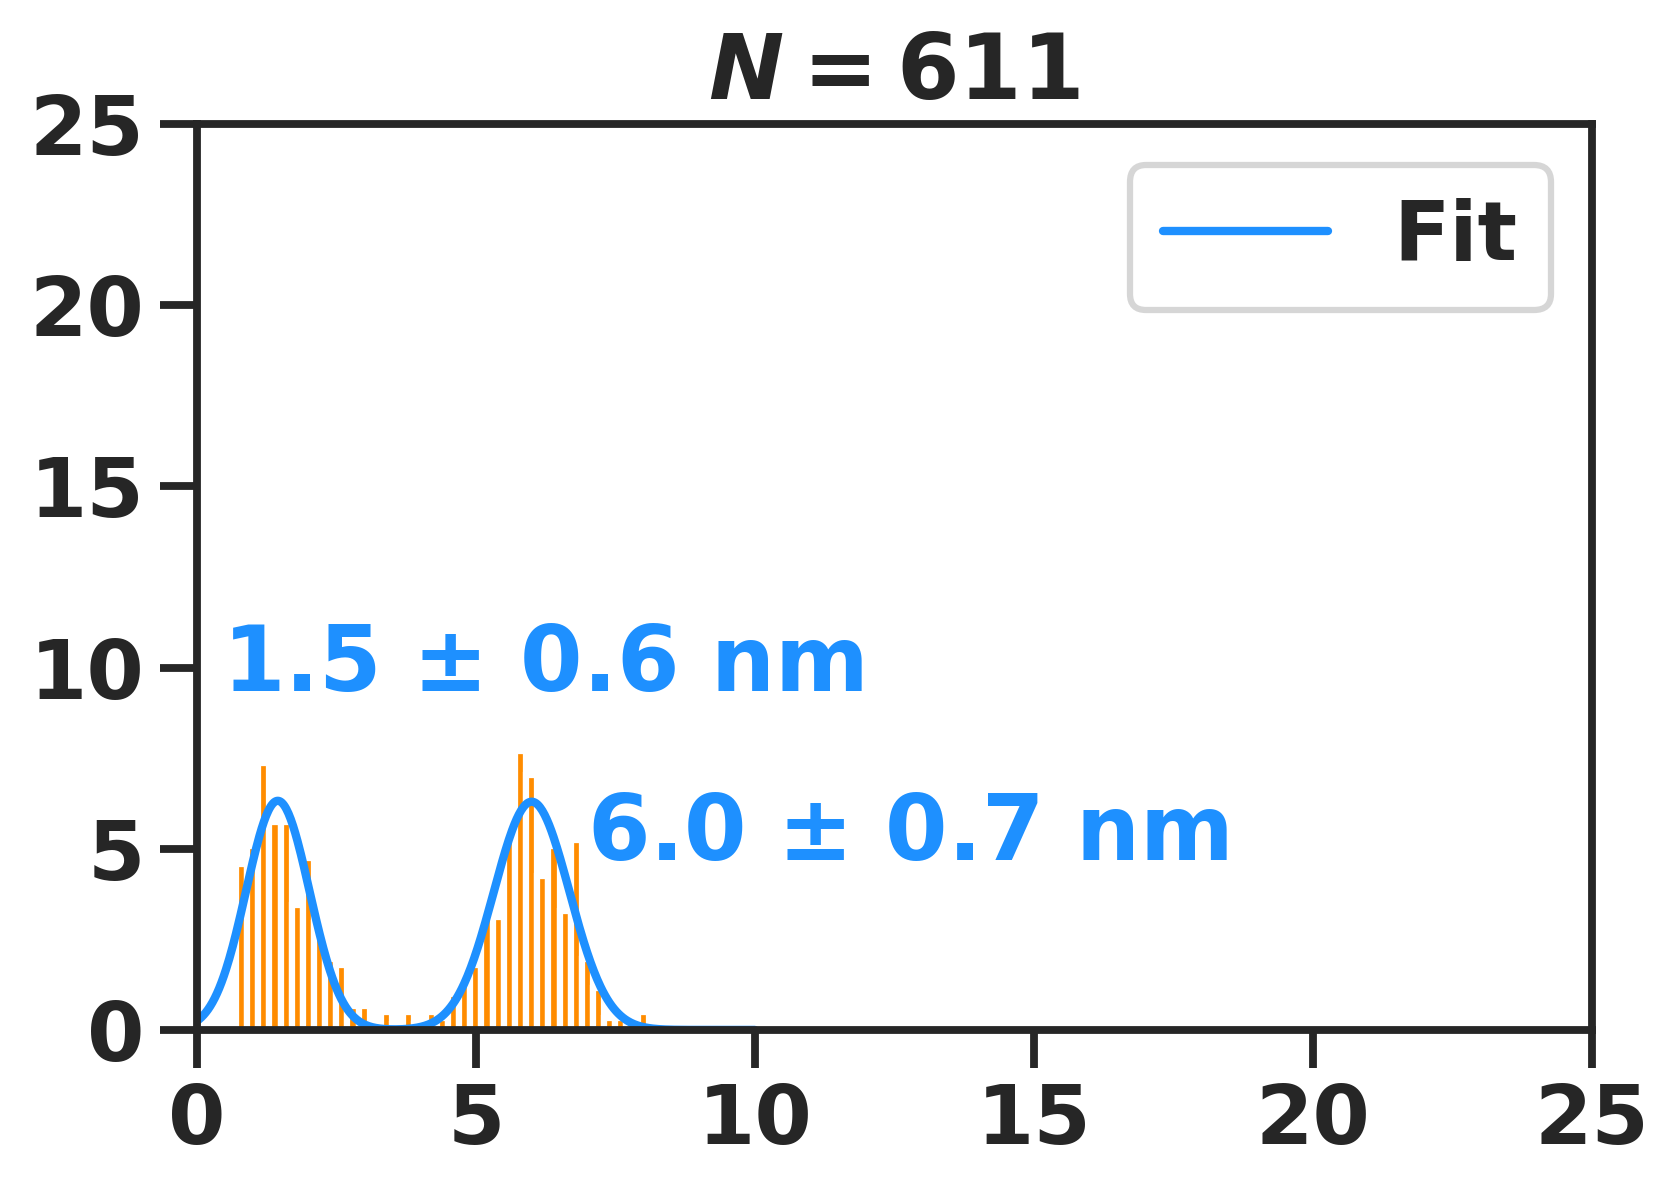

In [33]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_low*dist_1_low.pdf(x) + a2_low*dist_2_low.pdf(x)) * (edges[1]-edges[0]) * 100
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
#plt.hist(samples, density=True)
plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,25))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1-1, dist['laser_low'][centers < 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2+1, dist['laser_low'][centers > 4].max()-3, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=611$")

In [34]:
freq = dist['laser_high']

In [35]:
# The initial guess of parameters for Nelder-Mead
# E, gamma
#initial_guess = np.array([1, 3, 0.5, 1, 5, 0.5]) 
initial_guess = np.array([0.5, 1, 0.3, 1, 1, 6, 0.5])

In [36]:
# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_bimodal_ln, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

73.06587919881926 [7.25804730e-01 2.37484562e-08 9.67687419e-01 3.43236773e-01
 2.96078262e-01 5.36500002e+00 4.16953224e-01]


In [37]:
a1_high, mu1, sigma1, shift = fit_parms[0], fit_parms[1], fit_parms[2], fit_parms[3]

In [38]:
a2_high, mu2, sigma2 = fit_parms[4], fit_parms[5], fit_parms[6]

In [39]:
dist_1_high = lognorm(sigma1, scale=np.exp(mu1), loc=shift)
dist_2_high = norm(loc=mu2, scale=sigma2)

In [40]:
mu1, sigma1 = dist_1_high.mean(), dist_1_high.std()

Text(0.5, 1.0, '$N=366$')

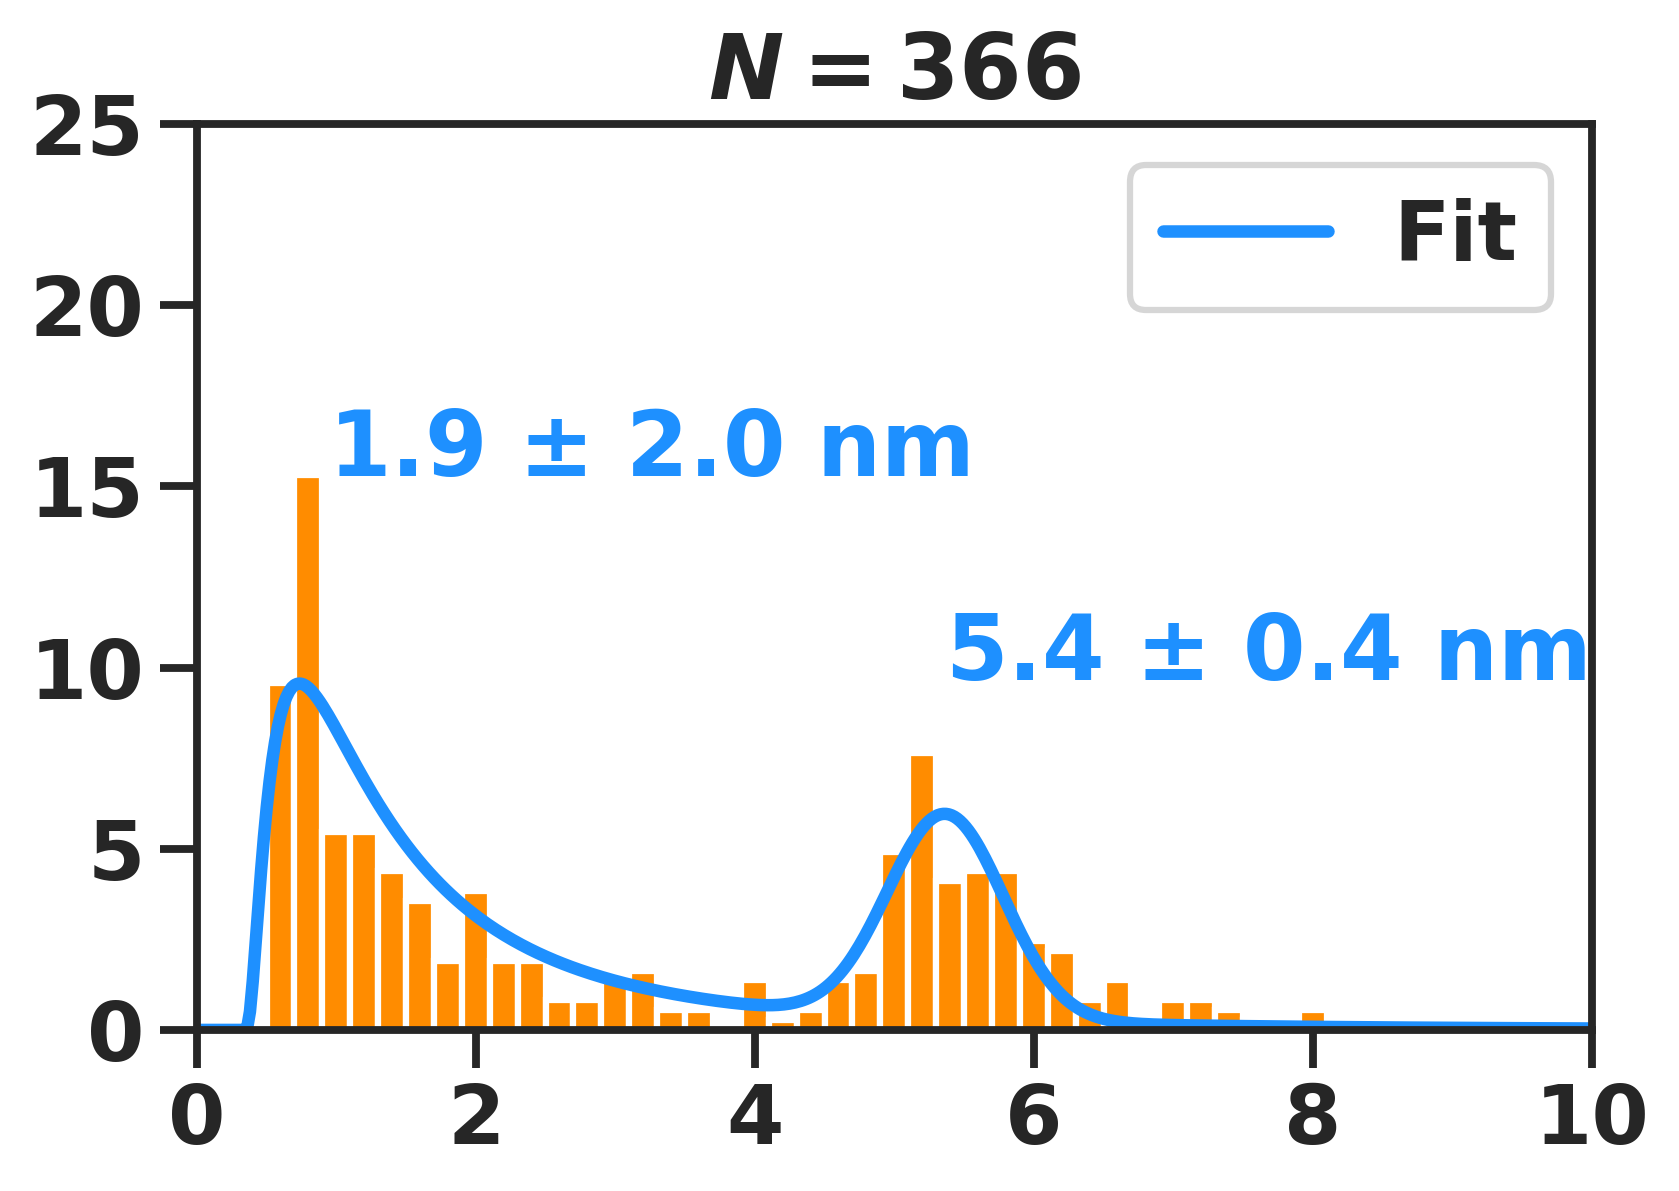

In [41]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_high*dist_1_high.pdf(x) + a2_high*dist_2_high.pdf(x)) * (edges[1]-edges[0]) * 100
np.savetxt('5nm_distfit_laser-high_x.txt', x)
np.savetxt('5nm_distfit_laser-high_y.txt', y)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linewidth=3)
#plt.hist(samples, density=True)
plt.xlim((0,10))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,25))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1-1, dist['laser_high'][centers < 4].max(), "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2, dist['laser_high'][centers > 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=366$")

Text(0.5, 1.0, '$N=366$')

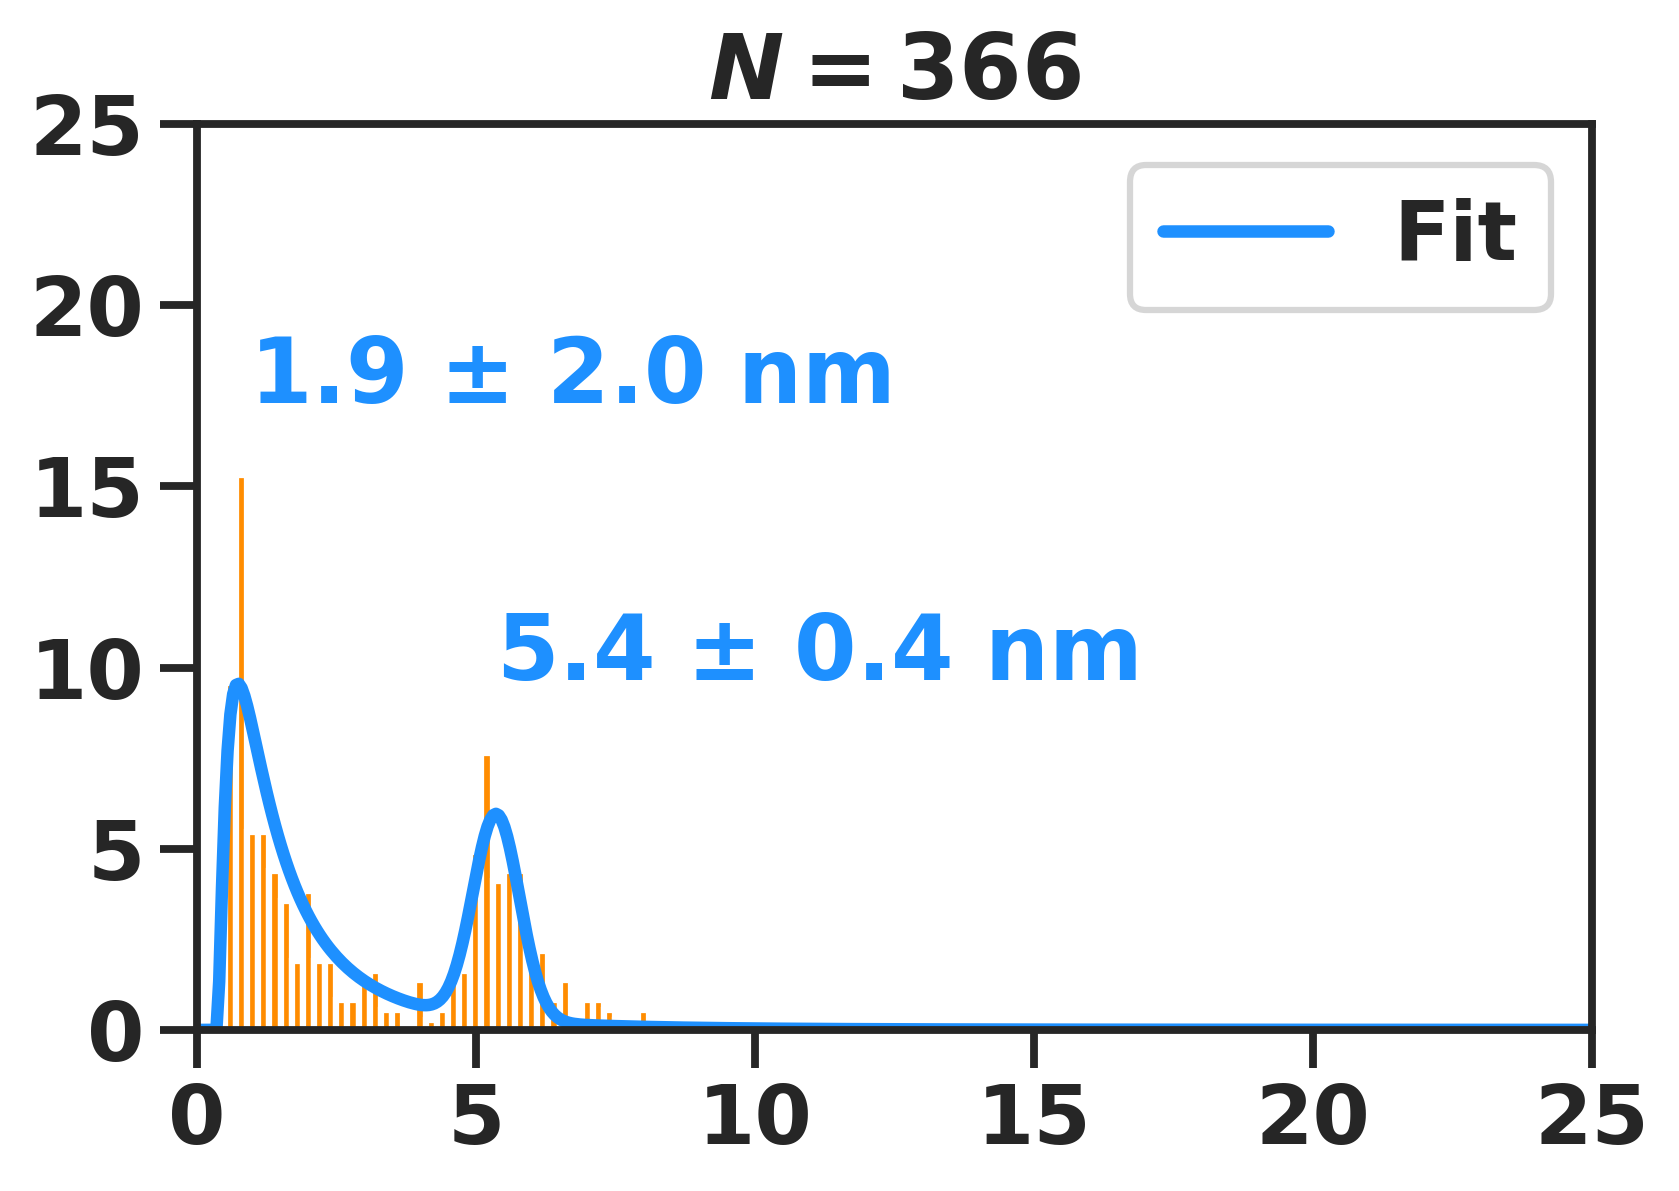

In [42]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,25, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_high*dist_1_high.pdf(x) + a2_high*dist_2_high.pdf(x)) * (edges[1]-edges[0]) * 100
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linewidth=3)
#plt.hist(samples, density=True)
plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,25))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1-1, dist['laser_high'][centers < 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2, dist['laser_high'][centers > 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=366$")

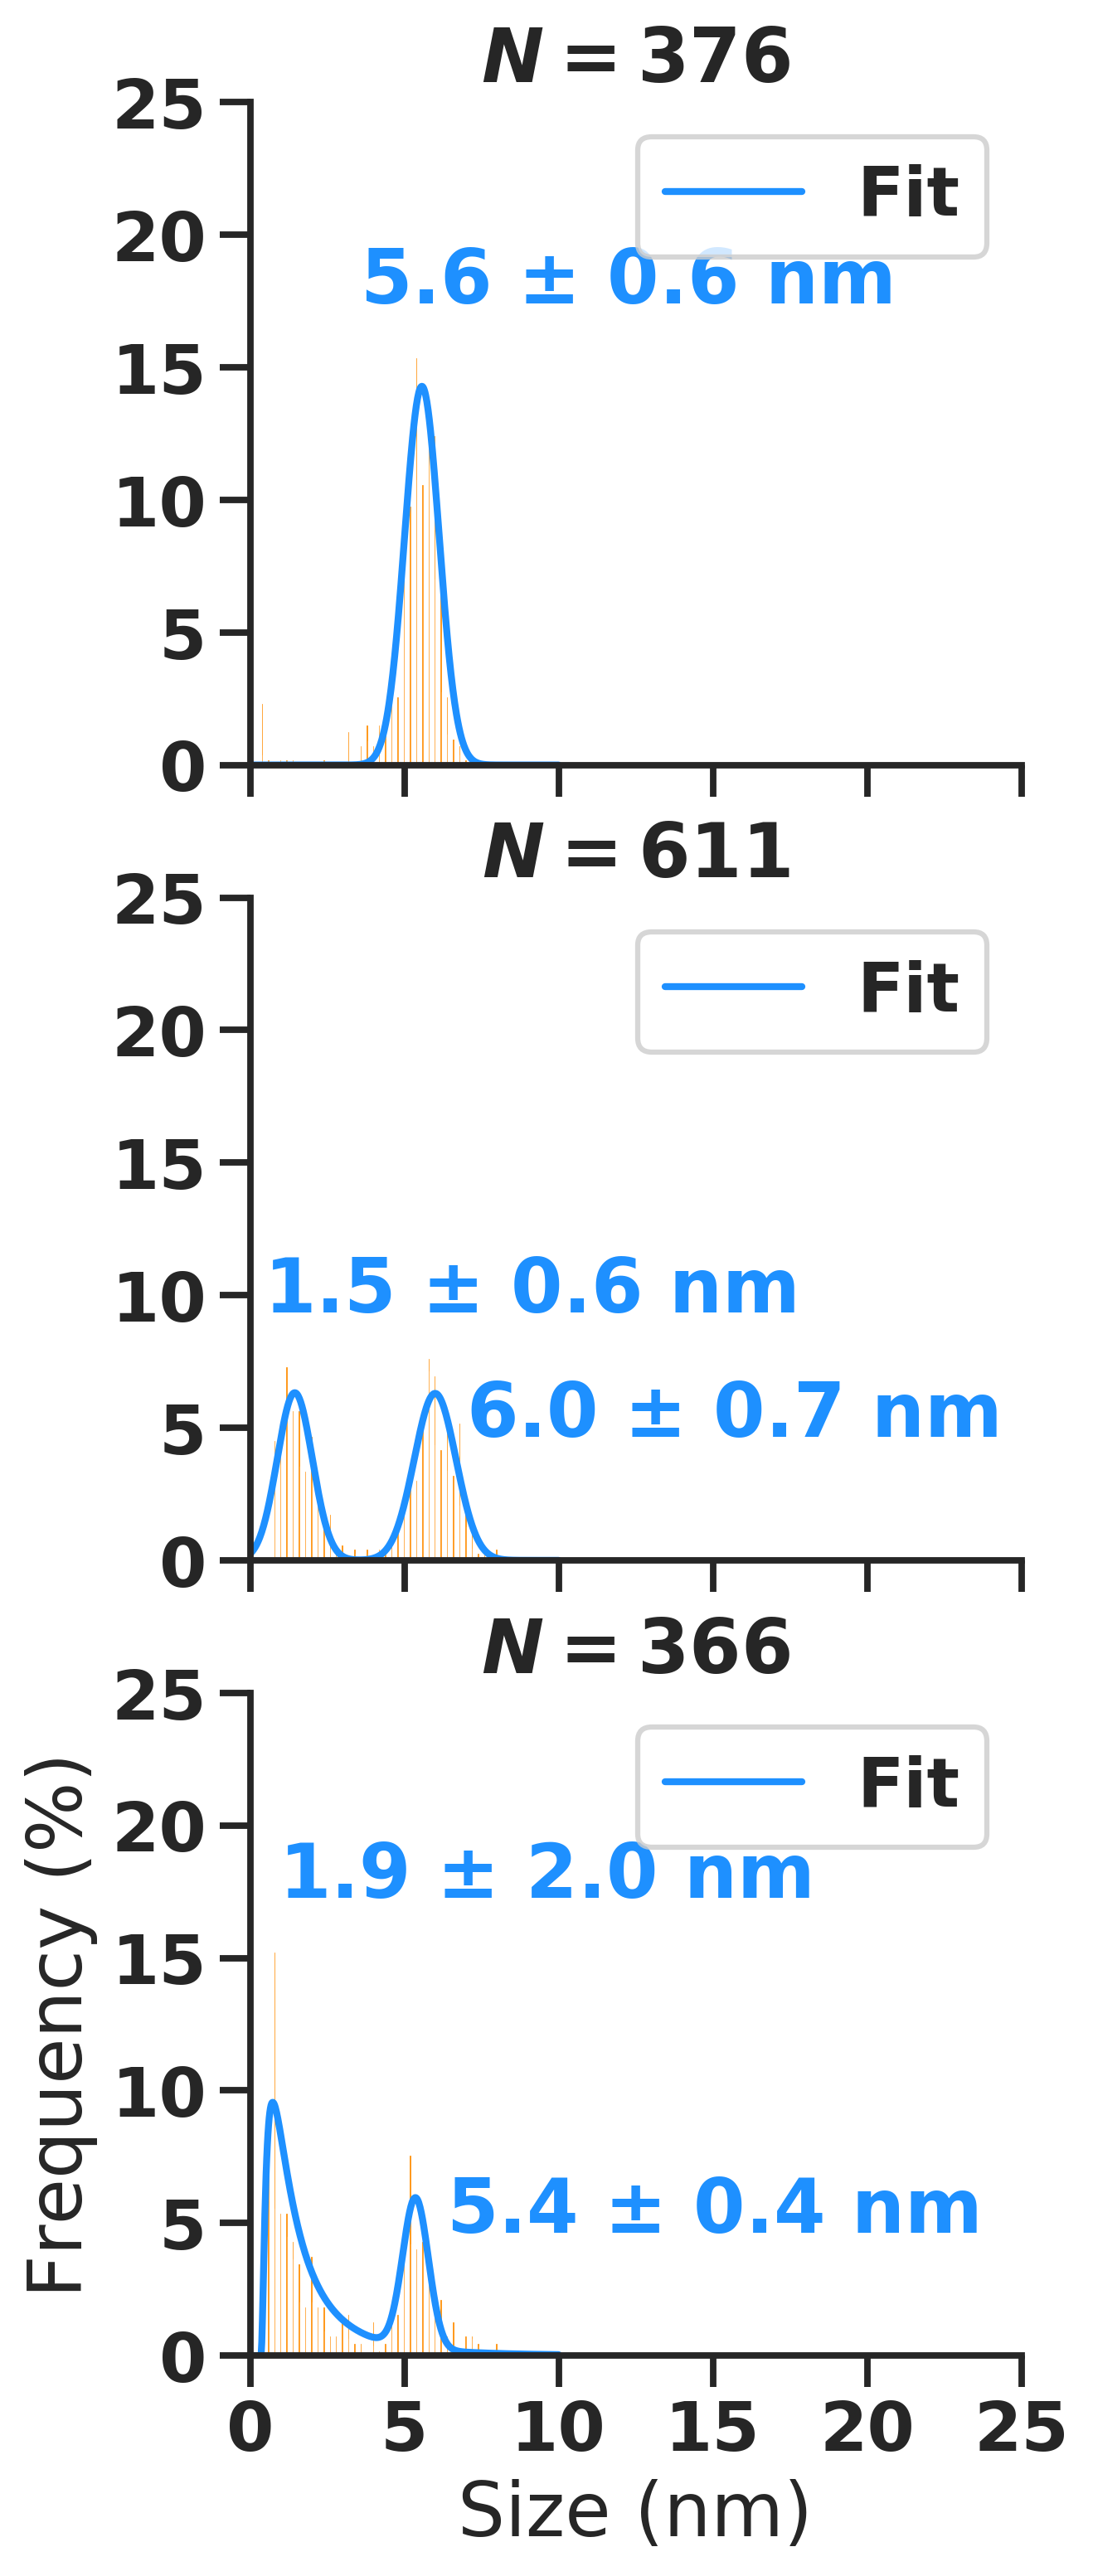

In [43]:
# Generate the plot for the distance fits at the different timepoints - IOI step 1 fitting
rows = 3
columns = 1
#rows = int(np.ceil(ndims/columns))
#if rows == 1:
#    rows += 1

f, axes = plt.subplots(rows, columns, figsize=(4, 12), sharex=True, sharey=True)

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
mu, sigma = dist_initial.mean(), dist_initial.std()

axes[0].hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None, rwidth=1)
axes[0].plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
axes[0].text(mu-2, dist['initial'].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue')
axes[0].legend(loc='upper right')
axes[0].set_title("$N=376$")
axes[0].set_xticks(ticks=np.arange(0,30, 5))
axes[0].set_xlim((0,25))
axes[0].set_ylim((0,25))
axes[0].set_yticks(ticks=np.arange(0,30, 5))

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_low*dist_1_low.pdf(x) + a2_low*dist_2_low.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_low.mean(), dist_1_low.std()
mu2, sigma2 = dist_2_low.mean(), dist_2_low.std()
axes[1].hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
axes[1].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[1].text(mu1-1, dist['laser_low'][centers < 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[1].text(mu2+1, dist['laser_low'][centers > 4].max()-3, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
axes[1].legend(loc='upper right')
axes[1].set_title("$N=611$")
axes[1].set_xticks(ticks=np.arange(0,30, 5))
axes[1].set_xlim((0,25))
axes[1].set_ylim((0,25))
axes[1].set_yticks(ticks=np.arange(0,30, 5))

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_high*dist_1_high.pdf(x) + a2_high*dist_2_high.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_high.mean(), dist_1_high.std()
mu2, sigma2 = dist_2_high.mean(), dist_2_high.std()
axes[2].hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
axes[2].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[2].text(mu1-1, dist['laser_high'][centers < 4].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[2].text(mu2+1, dist['laser_high'][centers > 4].max()-3, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
axes[2].legend(loc='upper right')
axes[2].set_title("$N=366$")
axes[2].set_xticks(ticks=np.arange(0,30, 5))
axes[2].set_xlim((0,25))
axes[2].set_ylim((0,25))
axes[2].set_yticks(ticks=np.arange(0,30, 5))

#plt.xlim((0,25))
plt.ylabel("Frequency (%)")
plt.xlabel("Size (nm)")
#plt.ylim((0,25))
sns.despine(bottom = False, left = False)


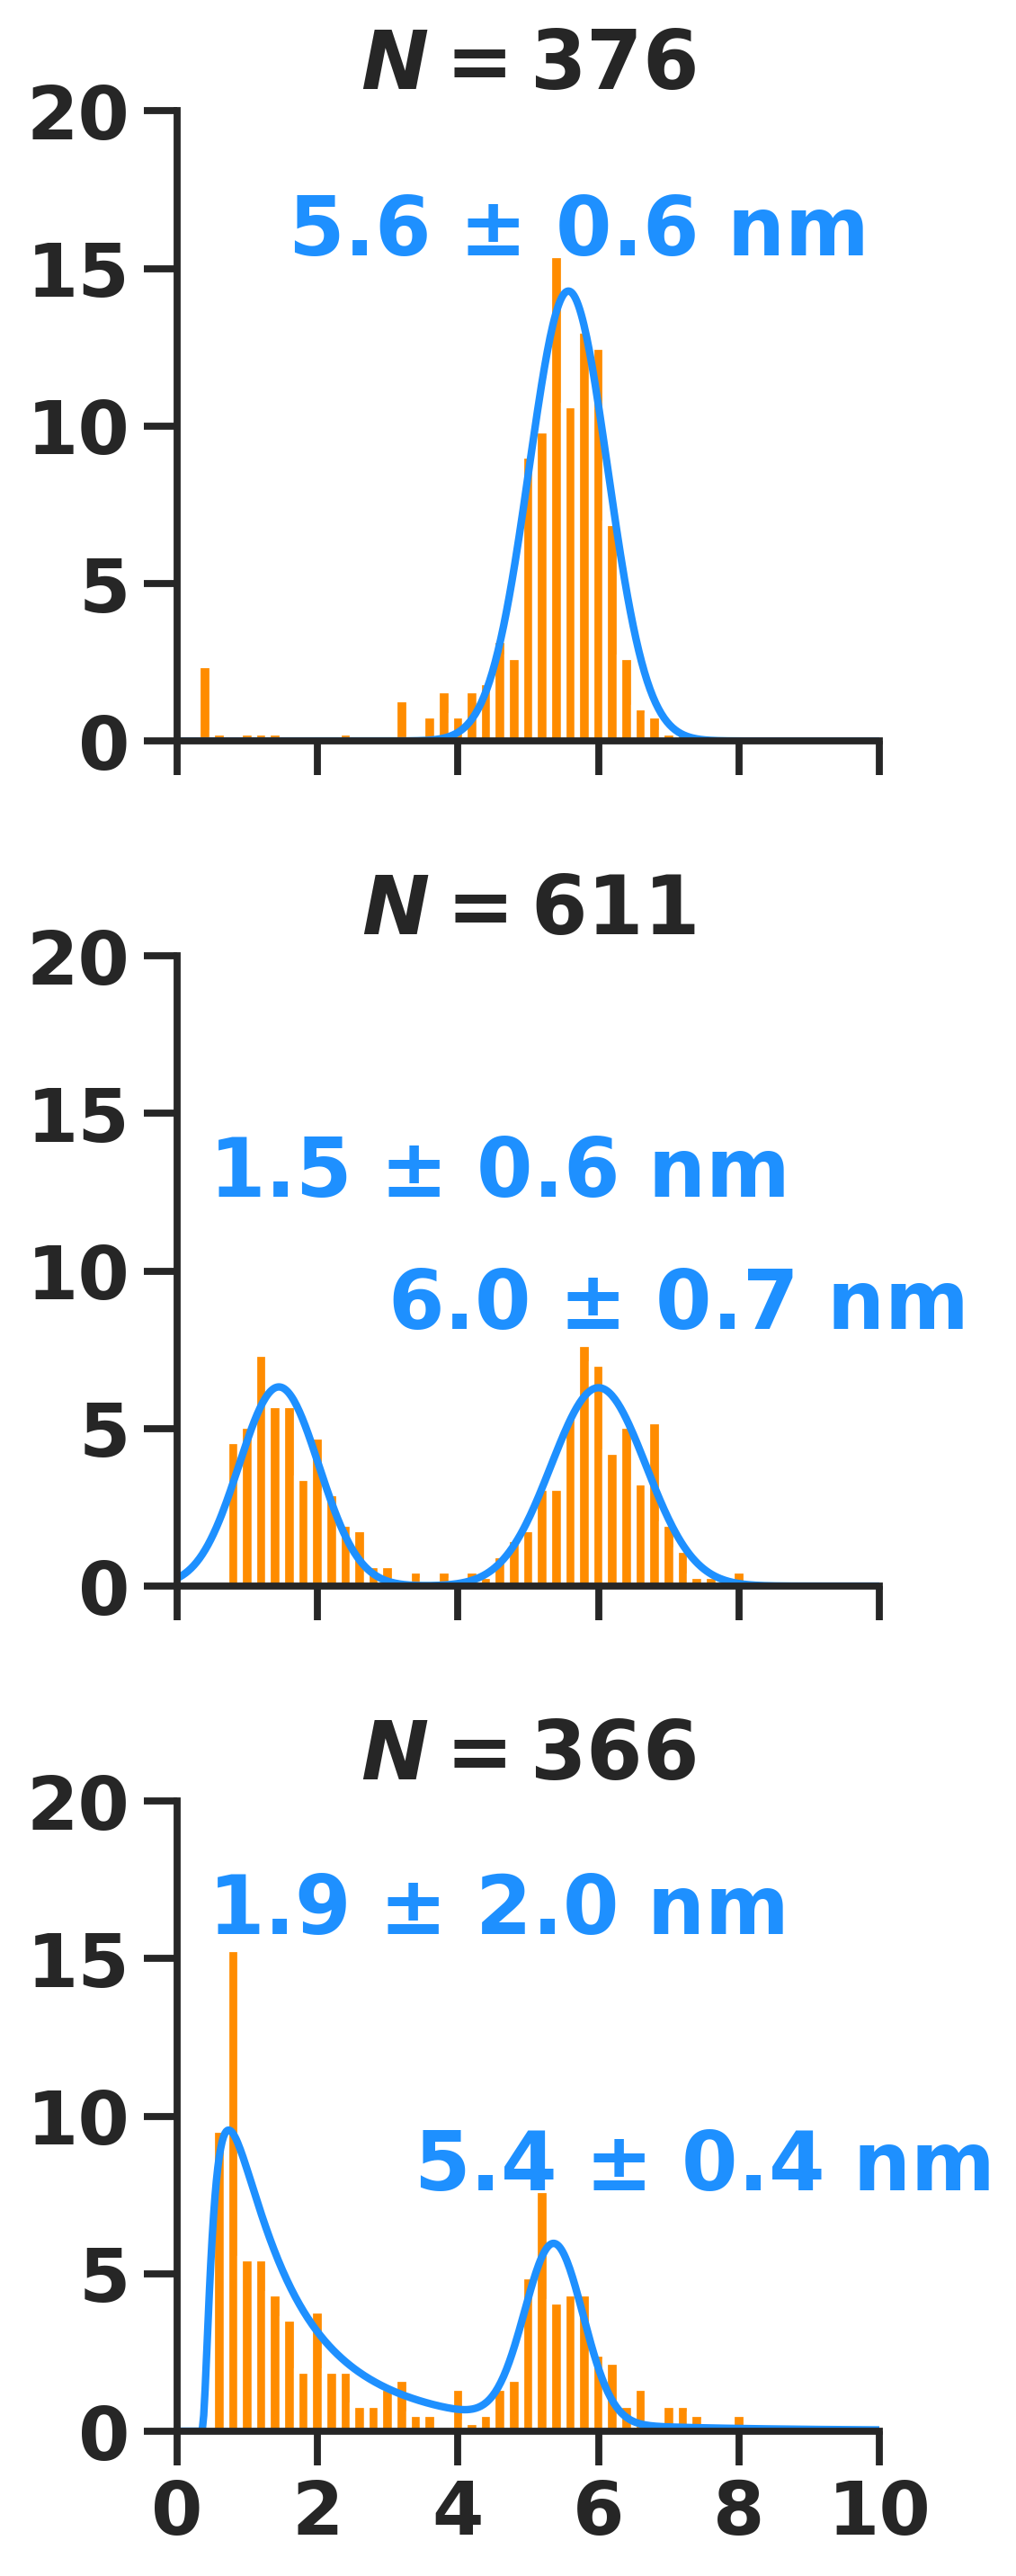

In [44]:
# Generate the plot 
rows = 3
columns = 1

f, axes = plt.subplots(rows, columns, figsize=(4, 10), sharex=True, sharey=False)

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
mu, sigma = dist_initial.mean(), dist_initial.std()

axes[0].hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None, rwidth=1)
axes[0].plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
axes[0].text(mu-4, dist['initial'].max(), "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue', fontweight='bold')
#axes[0].legend(loc='upper right')
axes[0].set_title("$N=376$")
axes[0].set_xticks(ticks=np.arange(0,12, 2))
axes[0].set_xlim((0,10))
axes[0].set_ylim((0,20))
axes[0].set_yticks(ticks=np.arange(0,25, 5))

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_low*dist_1_low.pdf(x) + a2_low*dist_2_low.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_low.mean(), dist_1_low.std()
mu2, sigma2 = dist_2_low.mean(), dist_2_low.std()
axes[1].hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
axes[1].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[1].text(mu1-1, dist['laser_low'][centers < 4].max()+5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[1].text(mu2-3, dist['laser_low'][centers > 4].max()+0.5, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
#axes[1].legend(loc='upper right')
axes[1].set_title("$N=611$")
axes[1].set_xticks(ticks=np.arange(0,12, 2))
axes[1].set_xlim((0,10))
axes[1].set_ylim((0,20))
axes[1].set_yticks(ticks=np.arange(0,25, 5))

x = np.linspace(0,10, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_high*dist_1_high.pdf(x) + a2_high*dist_2_high.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_high.mean(), dist_1_high.std()
mu2, sigma2 = dist_2_high.mean(), dist_2_high.std()
axes[2].hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
axes[2].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[2].text(mu1-1.5, dist['laser_high'][centers < 4].max()+0.5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[2].text(mu2-2, dist['laser_high'][centers > 4].max(), "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
#axes[2].legend(loc='upper right')
axes[2].set_title("$N=366$")
axes[2].set_xticks(ticks=np.arange(0,12, 2))
axes[2].set_xlim((0,10))
axes[2].set_ylim((0,20))
axes[2].set_yticks(ticks=np.arange(0,25, 5))

#plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
#plt.ylim((0,25))
sns.despine(bottom = False, left = False)
#f.subplots_adjust(wspace=0.25)
f.subplots_adjust(hspace=0.5)
#f.supxlabel("Frequency (%)")
#f.supylabel("Size (nm)")
plt.tight_layout()
plt.savefig('5nm_stacked.pdf')

# 15 nm

In [45]:
# Load the data
dist = pd.read_csv('15nm_distribution_moreparticles.csv')
dist.head()

,size,initial,laser_low,laser_high
0,2.0,0.0,0.675676,0.000000
1,2.5,0.0,4.054054,0.000000
2,3.0,0.0,14.189189,9.411765
3,3.5,0.0,12.837838,9.803922
4,4.0,0.0,12.162162,13.725490


In [46]:
# Get the histogram bin centers
centers = dist['size'].to_numpy()
centers

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. ,
       18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5,
       24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. ,
       29.5, 30. ])

In [47]:
# Histogram bin width
bw = centers[1] - centers[0]
bw

0.5

In [48]:
# Create the corresponding edges for the histogram
edges = np.linspace(centers[0] - 0.5*bw, centers[-1] + 0.5*bw, len(centers)+1, endpoint=True)
edges

array([ 1.75,  2.25,  2.75,  3.25,  3.75,  4.25,  4.75,  5.25,  5.75,
        6.25,  6.75,  7.25,  7.75,  8.25,  8.75,  9.25,  9.75, 10.25,
       10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75,
       15.25, 15.75, 16.25, 16.75, 17.25, 17.75, 18.25, 18.75, 19.25,
       19.75, 20.25, 20.75, 21.25, 21.75, 22.25, 22.75, 23.25, 23.75,
       24.25, 24.75, 25.25, 25.75, 26.25, 26.75, 27.25, 27.75, 28.25,
       28.75, 29.25, 29.75, 30.25])

In [49]:
freq = dist['initial']

In [50]:
# The initial guess of parameters for Nelder-Mead
# E, gamma
initial_guess = np.array([15, 5]) 

In [51]:
# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_unimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

66.7653008197741 [15.42312461  2.14734752]


In [52]:
mu, sigma = fit_parms[0], fit_parms[1]

In [53]:
dist_initial = norm(loc=mu, scale=sigma)

Text(0.5, 1.0, '$N=300$')

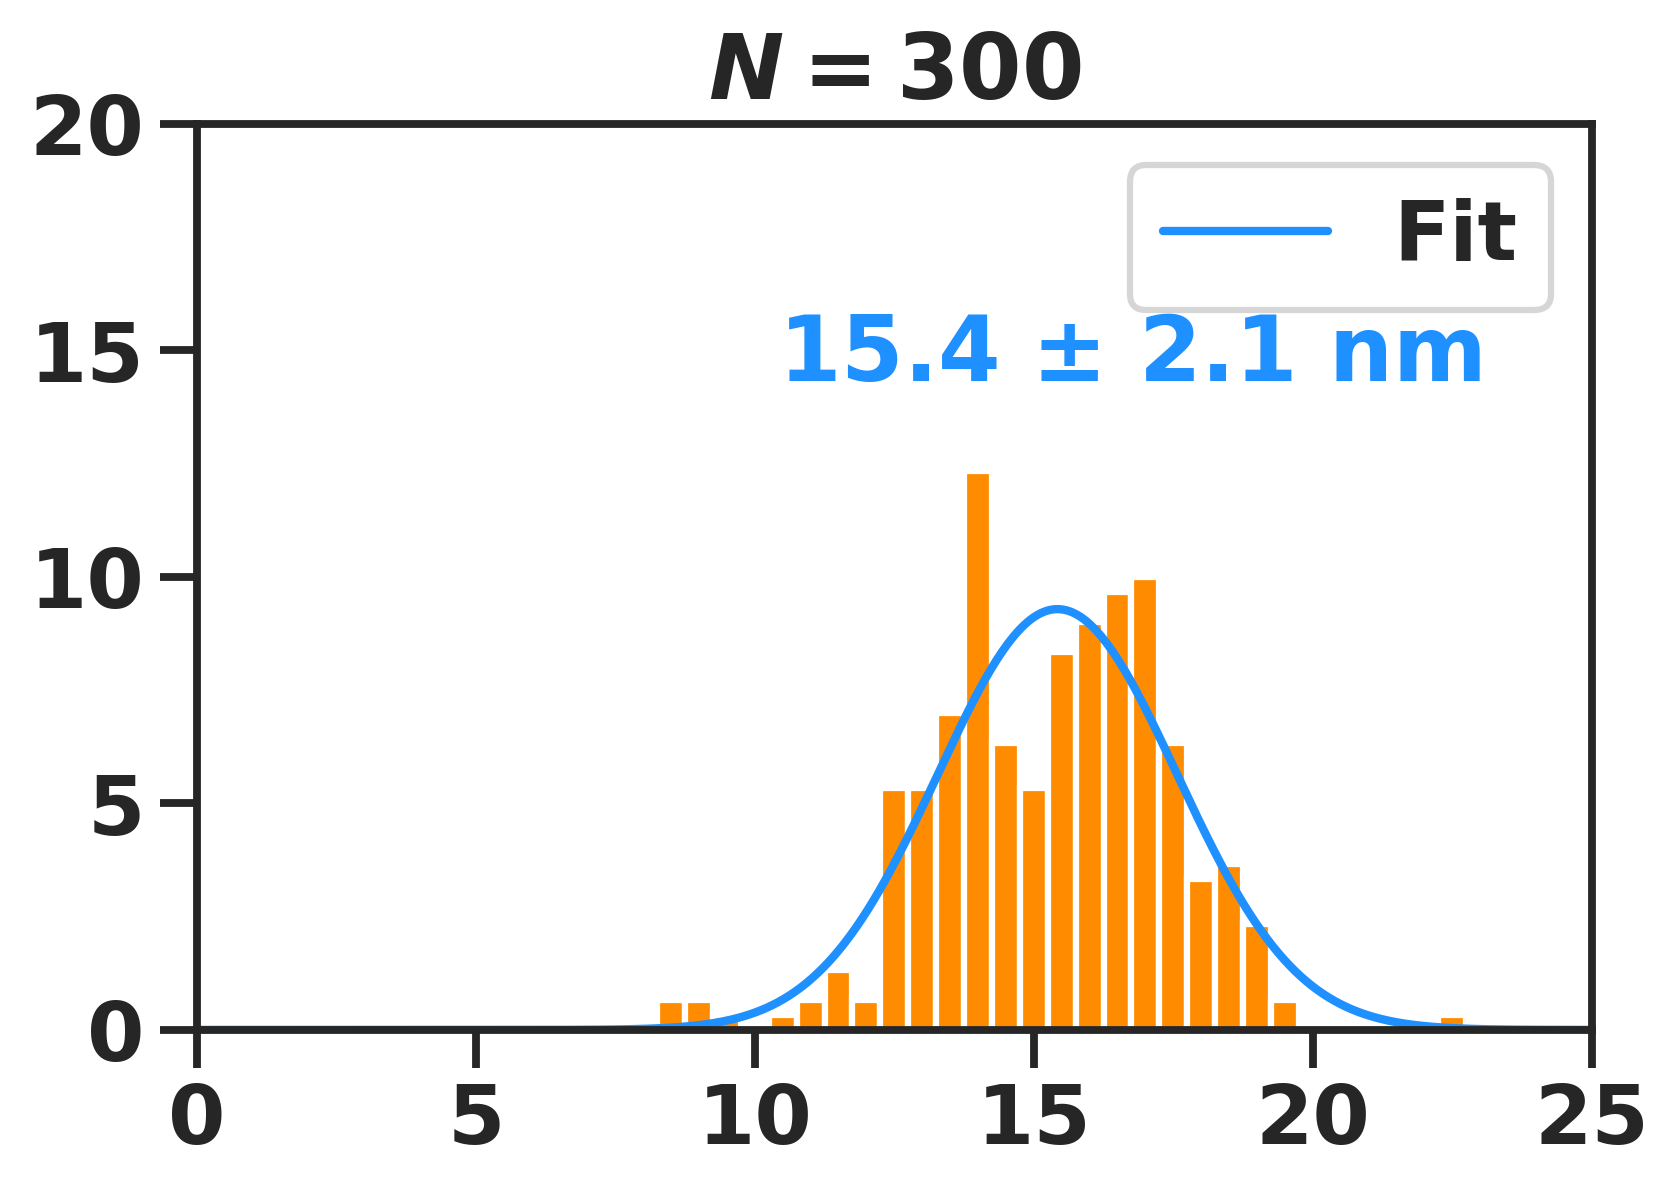

In [54]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,25, 500, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
np.savetxt('15nm_distfit_initial_x.txt', x)
np.savetxt('15nm_distfit_initial_y.txt', y)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
#plt.hist(samples, density=True)
plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,20))
#plt.text(0.5, 20, "$\mu$ $\pm$ $\sigma$: \n{:.1f} $\pm$ {:.1f} nm".format(mu, sigma))
plt.text(mu-5, dist['initial'].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=300$")

In [55]:
freq = dist['laser_low']

In [56]:
# The initial guess of parameters for Nelder-Mead
# E, gamma
initial_guess = np.array([1, 5, 2, 1, 15, 2]) 

In [57]:
# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_bimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

63.689386747463196 [ 0.69094765  3.76673903  1.05510865  0.27432202 14.91986454  0.76792633]


In [58]:
a1_low, mu1, sigma1 = fit_parms[0], fit_parms[1], fit_parms[2]

In [59]:
a2_low, mu2, sigma2 = fit_parms[3], fit_parms[4], fit_parms[5]

In [60]:
dist_1_low = norm(loc=mu1, scale=sigma1)
dist_2_low = norm(loc=mu2, scale=sigma2)

Text(0.5, 1.0, '$N=148$')

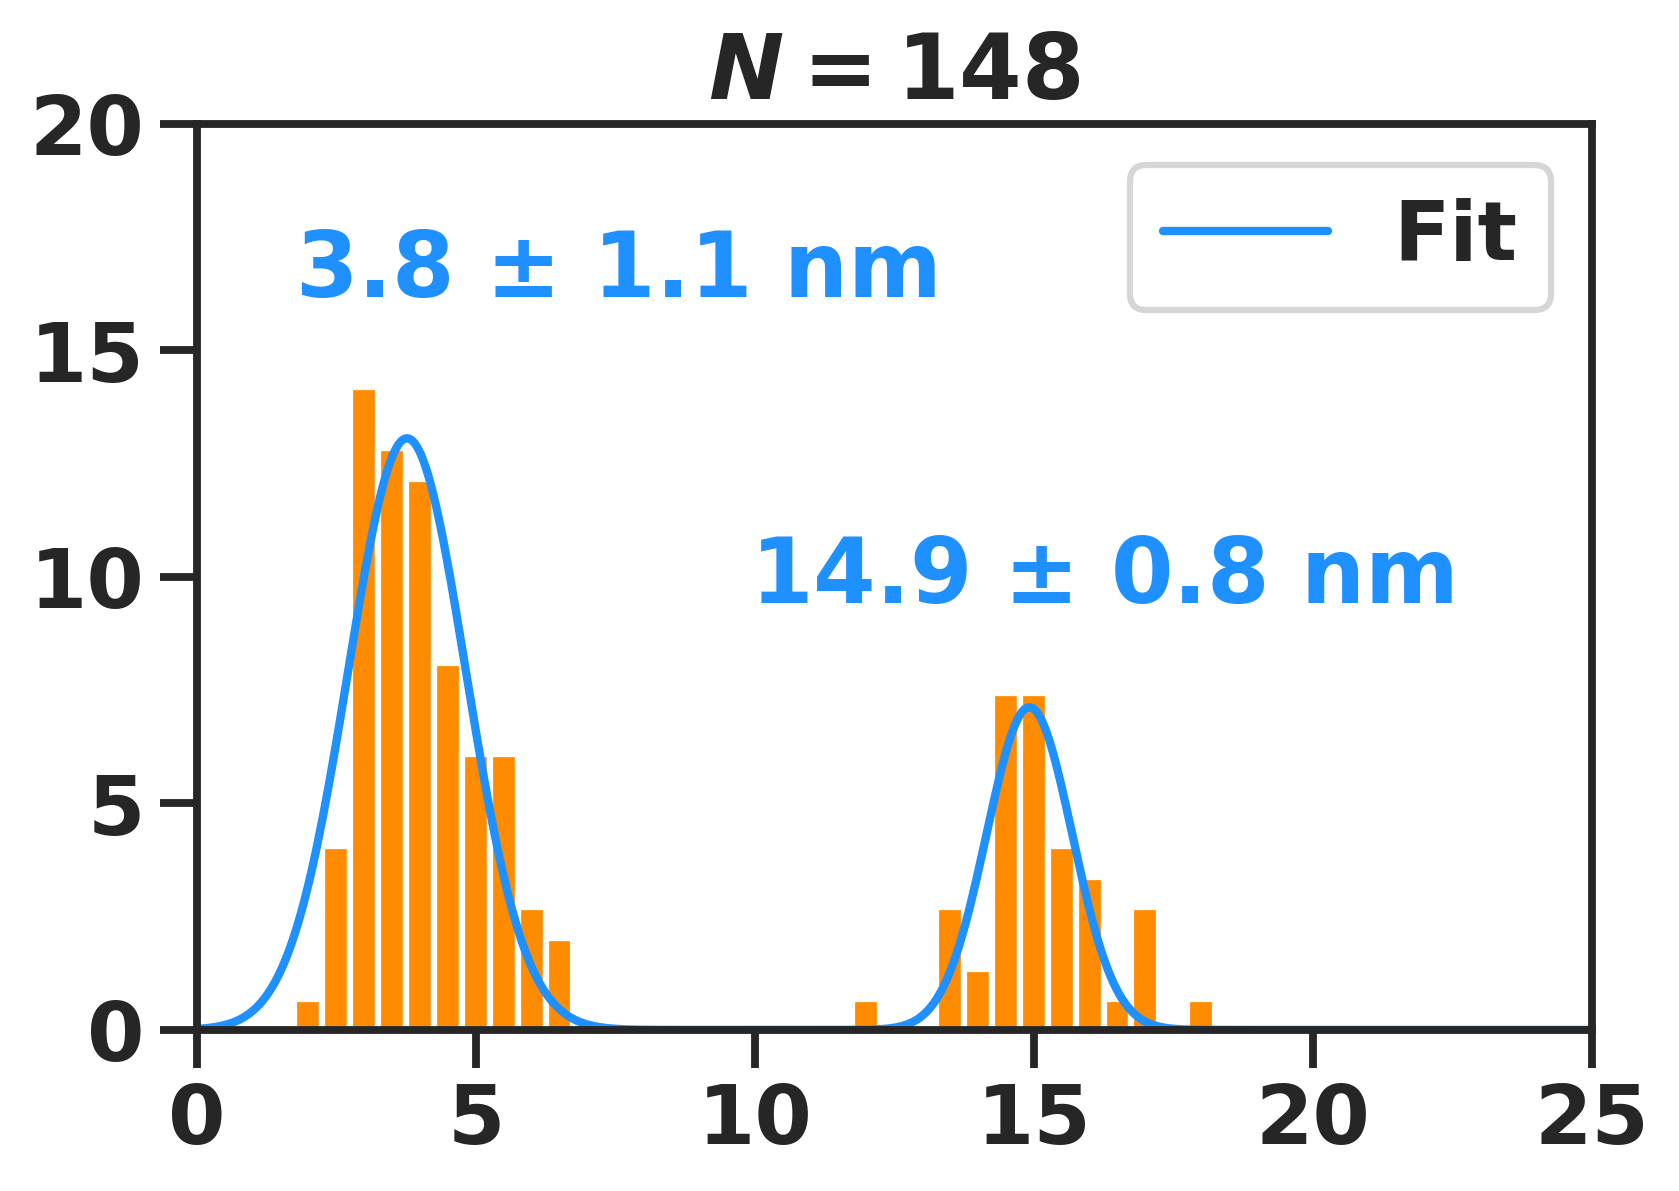

In [61]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,25, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_low*dist_1_low.pdf(x) + a2_low*dist_2_low.pdf(x)) * (edges[1]-edges[0]) * 100
np.savetxt('15nm_distfit_laser-low_x.txt', x)
np.savetxt('15nm_distfit_laser-low_y.txt', y)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
#plt.hist(samples, density=True)
plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,20))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1-2, dist['laser_low'][centers < 10].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2-5, dist['laser_low'][centers > 10].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=148$")

In [62]:
freq = dist['laser_high']

In [63]:
# The initial guess of parameters for Nelder-Mead
# E, gamma
initial_guess = np.array([1, 5, 2, 1, 17, 2]) 

In [64]:
# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_bimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

65.36118366387404 [ 0.89443685  4.59597219  1.33705762  0.13733014 12.18831229  5.98958411]


In [65]:
a1_high, mu1, sigma1 = fit_parms[0], fit_parms[1], fit_parms[2]

In [66]:
a2_high, mu2, sigma2 = fit_parms[3], fit_parms[4], fit_parms[5]

In [67]:
dist_1_high = norm(loc=mu1, scale=sigma1)
dist_2_high = norm(loc=mu2, scale=sigma2)

Text(0.5, 1.0, '$N=255$')

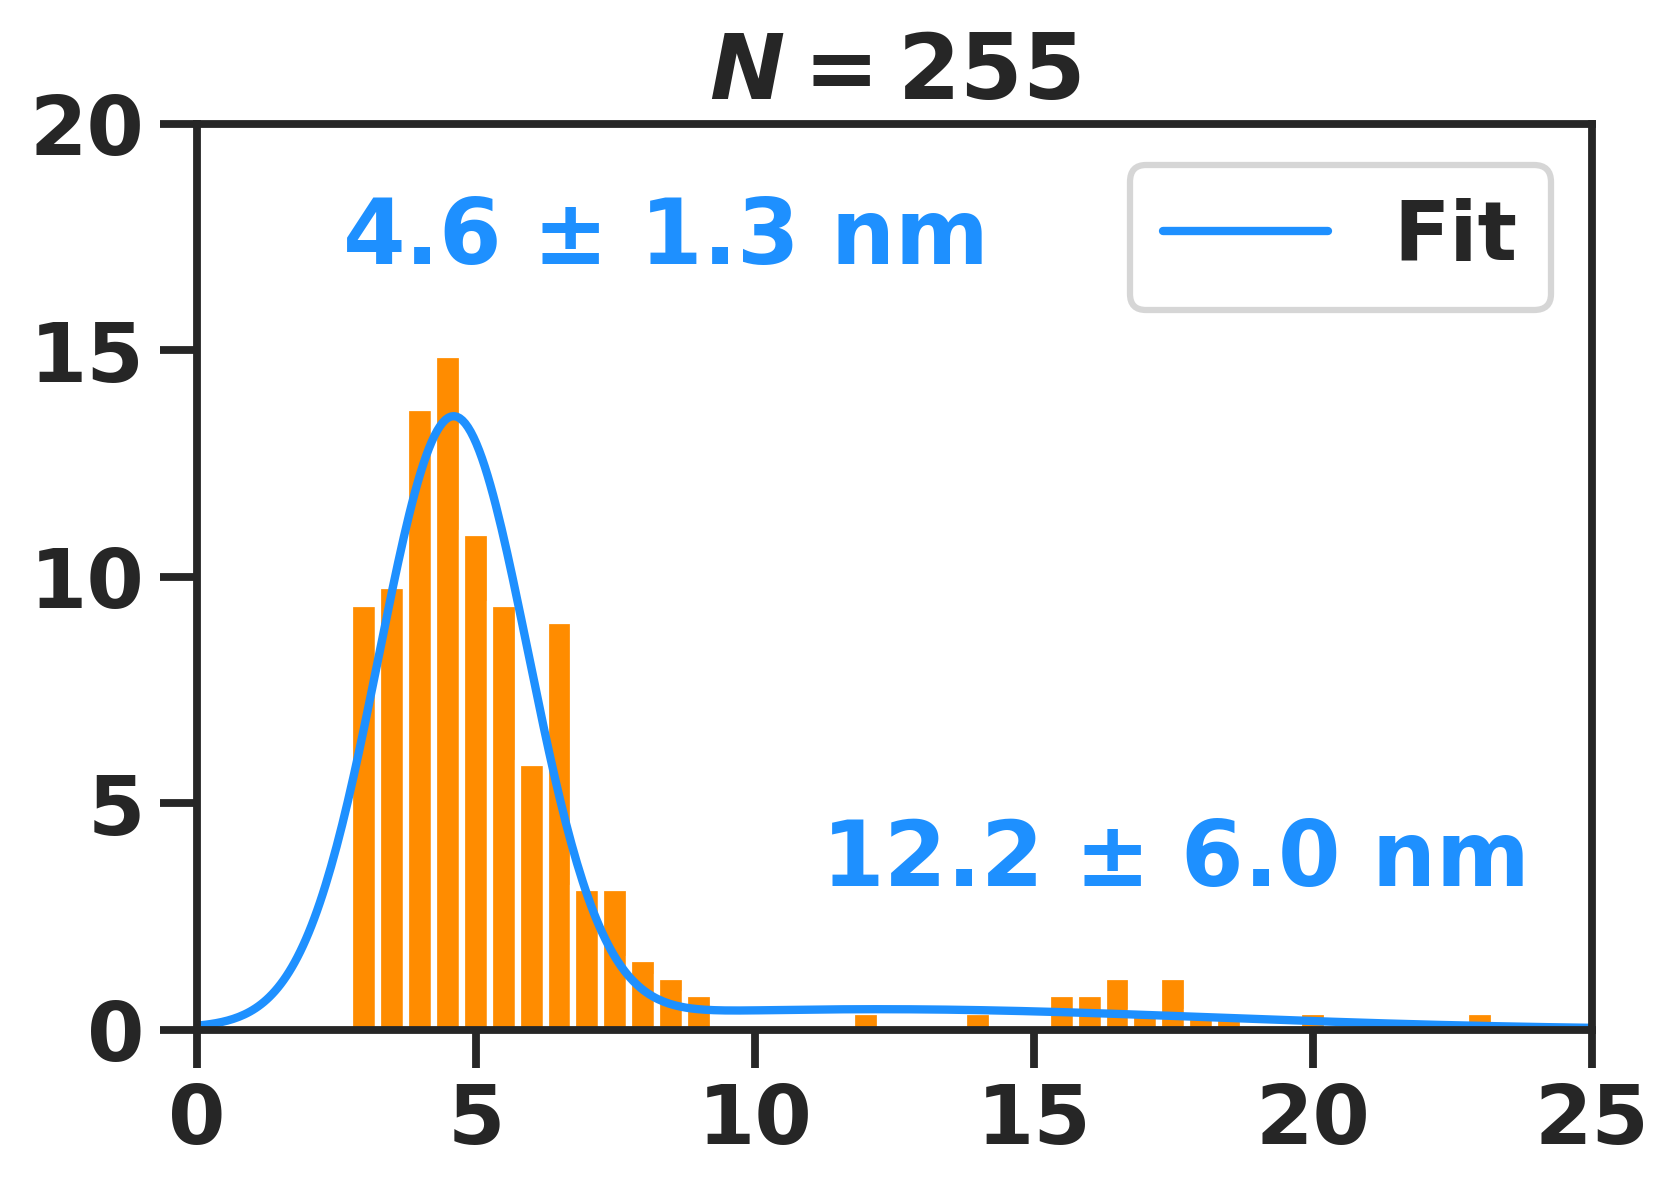

In [68]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,25, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_high*dist_1_high.pdf(x) + a2_high*dist_2_high.pdf(x)) * (edges[1]-edges[0]) * 100
np.savetxt('15nm_distfit_laser-high_x.txt', x)
np.savetxt('15nm_distfit_laser-high_y.txt', y)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
#plt.hist(samples, density=True)
plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,20))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1-2, dist['laser_high'][centers < 10].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2-1, dist['laser_high'][centers > 10].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=255$")

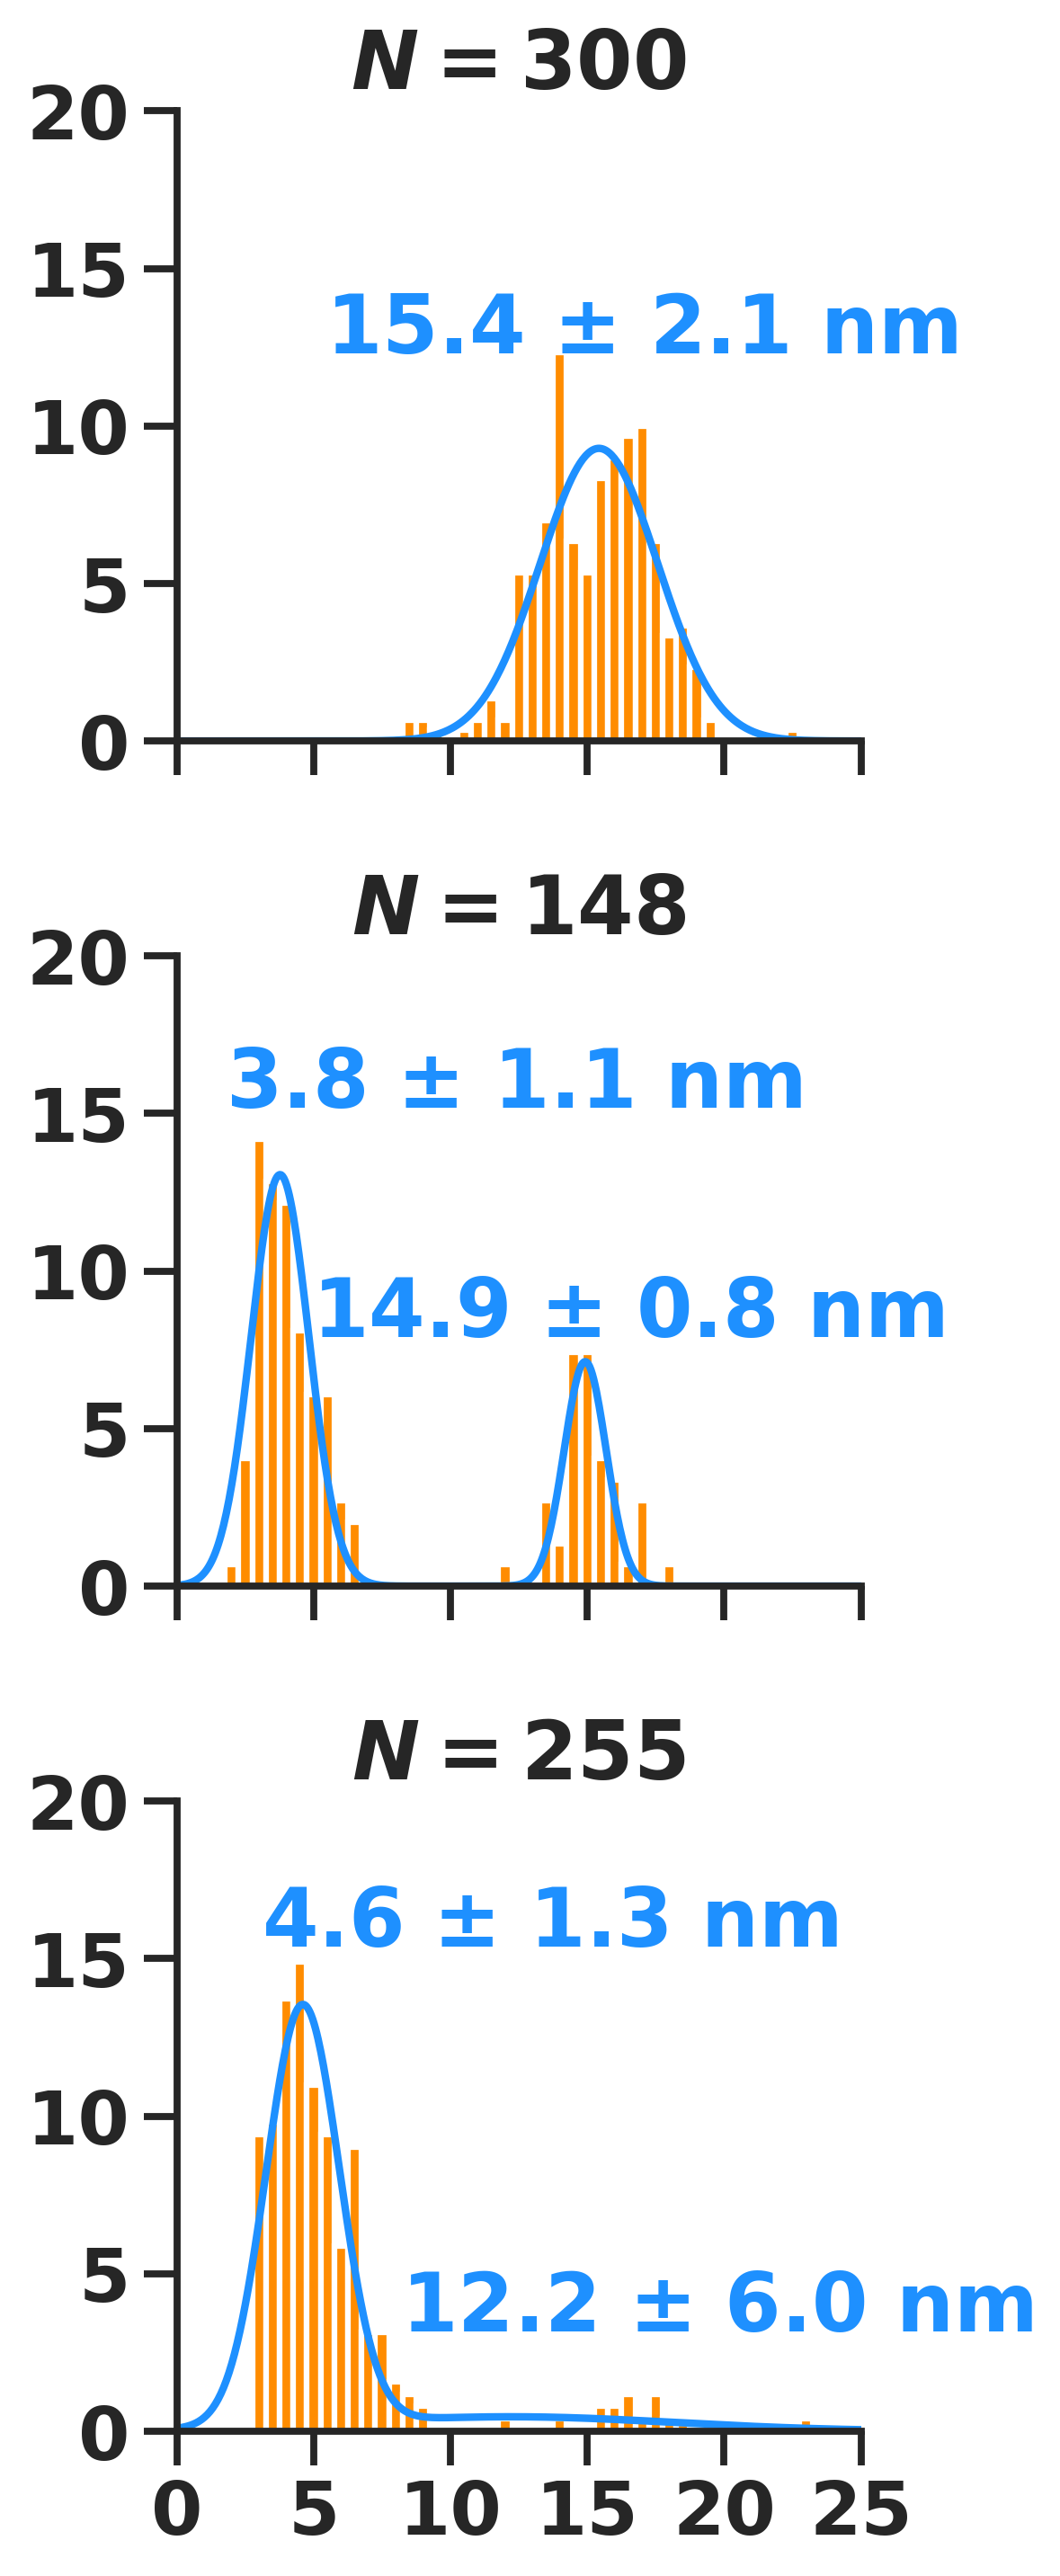

In [69]:
# Generate the plot 
rows = 3
columns = 1

f, axes = plt.subplots(rows, columns, figsize=(4, 10), sharex=True, sharey=False)

x = np.linspace(0,25, 500, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
mu, sigma = dist_initial.mean(), dist_initial.std()

axes[0].hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None, rwidth=1)
axes[0].plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
axes[0].text(mu-10, dist['initial'].max(), "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue', fontweight='bold')
#axes[0].legend(loc='upper right')
axes[0].set_title("$N=300$")
axes[0].set_xticks(ticks=np.arange(0,30, 5))
axes[0].set_xlim((0,25))
axes[0].set_ylim((0,20))
axes[0].set_yticks(ticks=np.arange(0,25, 5))

x = np.linspace(0,25, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_low*dist_1_low.pdf(x) + a2_low*dist_2_low.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_low.mean(), dist_1_low.std()
mu2, sigma2 = dist_2_low.mean(), dist_2_low.std()
axes[1].hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
axes[1].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[1].text(mu1-2, dist['laser_low'][centers < 10].max()+1, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[1].text(mu2-10, dist['laser_low'][centers > 10].max()+0.5, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
#axes[1].legend(loc='upper right')
axes[1].set_title("$N=148$")
axes[1].set_xticks(ticks=np.arange(0,30, 5))
axes[1].set_xlim((0,25))
axes[1].set_ylim((0,20))
axes[1].set_yticks(ticks=np.arange(0,25, 5))

x = np.linspace(0,25, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_high*dist_1_high.pdf(x) + a2_high*dist_2_high.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_high.mean(), dist_1_high.std()
mu2, sigma2 = dist_2_high.mean(), dist_2_high.std()
axes[2].hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
axes[2].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[2].text(mu1-1.5, dist['laser_high'][centers < 10].max()+0.5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[2].text(mu2-4, dist['laser_high'][centers > 10].max()+2, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
#axes[2].legend(loc='upper right')
axes[2].set_title("$N=255$")
axes[2].set_xticks(ticks=np.arange(0,30, 5))
axes[2].set_xlim((0,25))
axes[2].set_ylim((0,20))
axes[2].set_yticks(ticks=np.arange(0,25, 5))

#plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
#plt.ylim((0,25))
sns.despine(bottom = False, left = False)
#f.subplots_adjust(wspace=0.25)
f.subplots_adjust(hspace=0.5)
#f.supxlabel("Frequency (%)")
#f.supylabel("Size (nm)")
plt.tight_layout()
plt.savefig('15nm_stacked.pdf')

# 100 nm

In [70]:
# Load the data
dist = pd.read_csv('100nm_distribution_moreparticles.csv')
dist.head()

,size,initial,laser_low,laser_high
0,5,0.0,0.196078,0.000000
1,10,0.0,38.235294,22.886598
2,15,0.0,20.980392,46.804124
3,20,0.0,8.039216,13.402062
4,25,0.0,5.686275,5.773196


In [71]:
# Get the histogram bin centers
centers = dist['size'].to_numpy()
centers

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170])

In [72]:
# Histogram bin width
bw = centers[1] - centers[0]
bw

5

In [73]:
# Create the corresponding edges for the histogram
edges = np.linspace(centers[0] - 0.5*bw, centers[-1] + 0.5*bw, len(centers)+1, endpoint=True)
edges

array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
        47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,
        92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5, 132.5,
       137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5])

In [74]:
freq = dist['initial']

In [75]:
# The initial guess of parameters for Nelder-Mead
# E, gamma
initial_guess = np.array([100, 10]) 

In [76]:
# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_unimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

34.5452646682982 [102.57190626  11.63491762]


In [77]:
mu, sigma = fit_parms[0], fit_parms[1]

In [78]:
dist_initial = norm(loc=mu, scale=sigma)

Text(0.5, 1.0, '$N=305$')

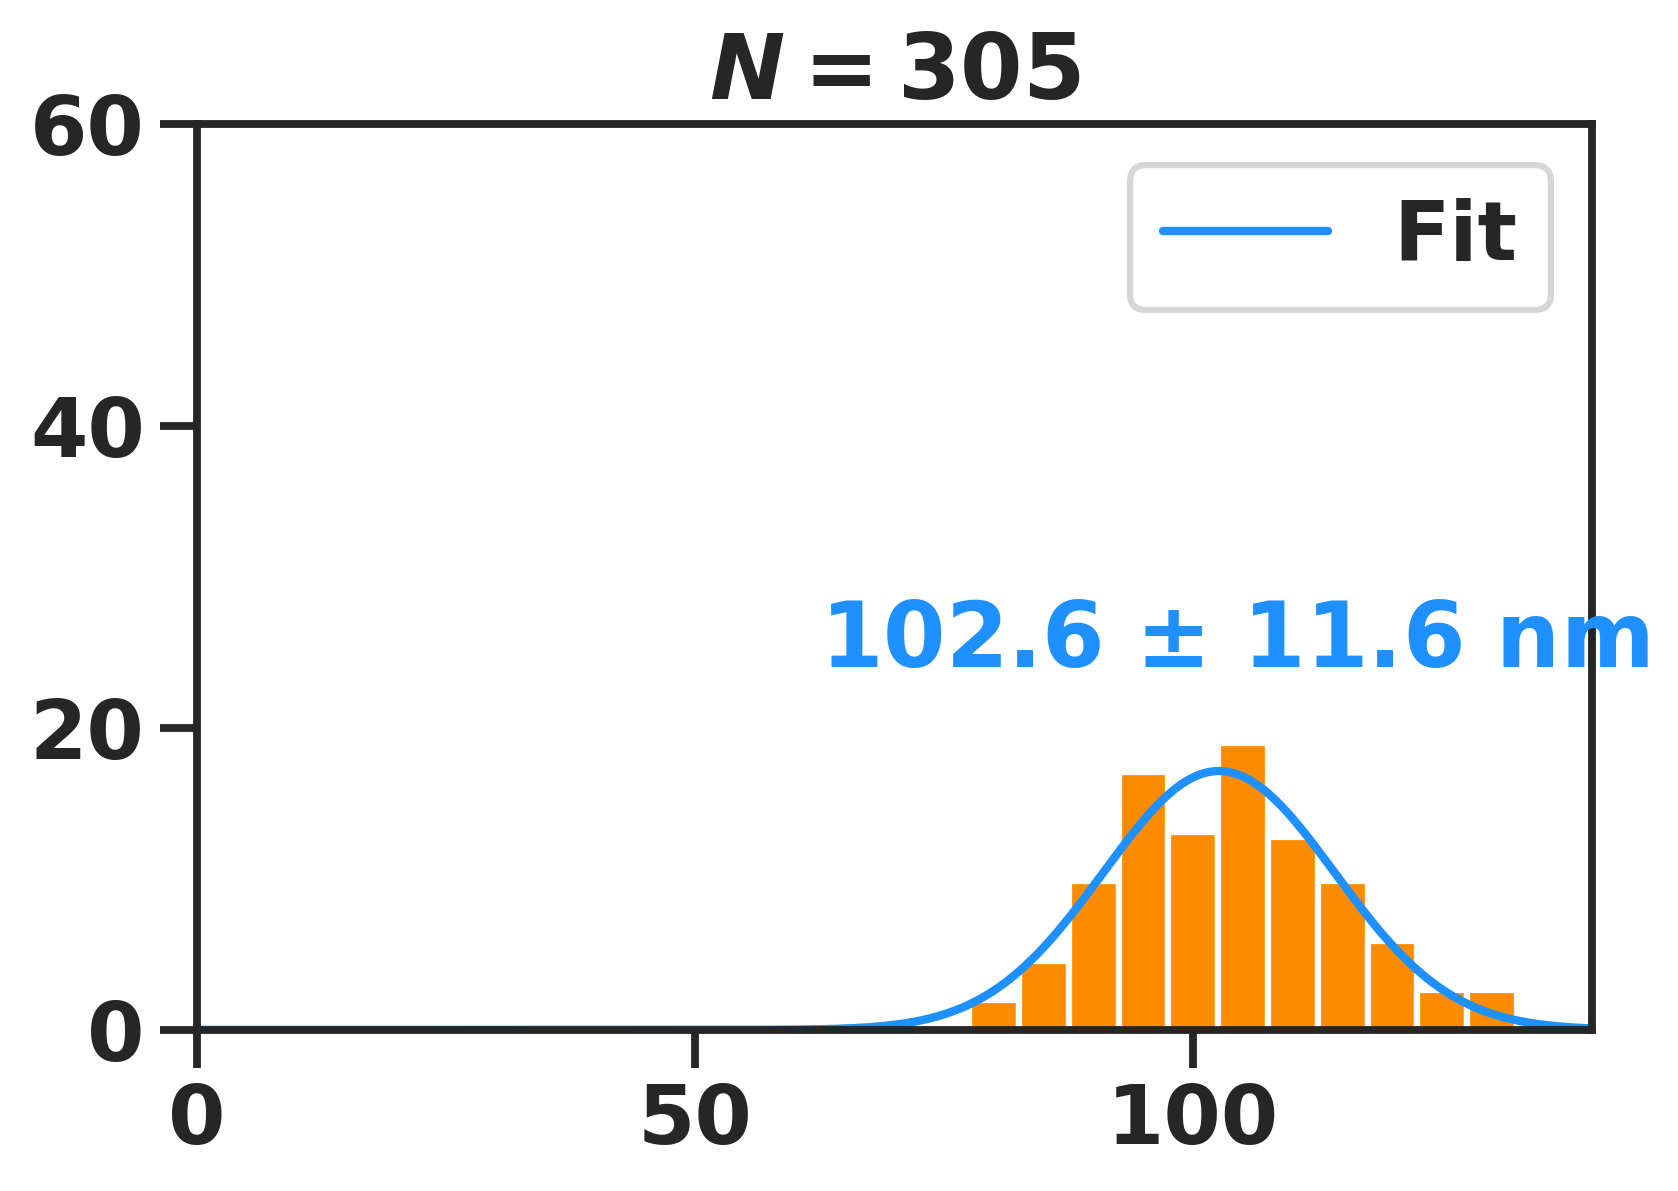

In [79]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,140, 1000, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
np.savetxt('100nm_distfit_initial_x.txt', x)
np.savetxt('100nm_distfit_initial_y.txt', y)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
#plt.hist(samples, density=True)
plt.xlim((0,140))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,60))
#plt.text(0.5, 20, "$\mu$ $\pm$ $\sigma$: \n{:.1f} $\pm$ {:.1f} nm".format(mu, sigma))
plt.text(mu-40, dist['initial'].max()+5, "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=305$")

Text(0.5, 1.0, '$N=305$')

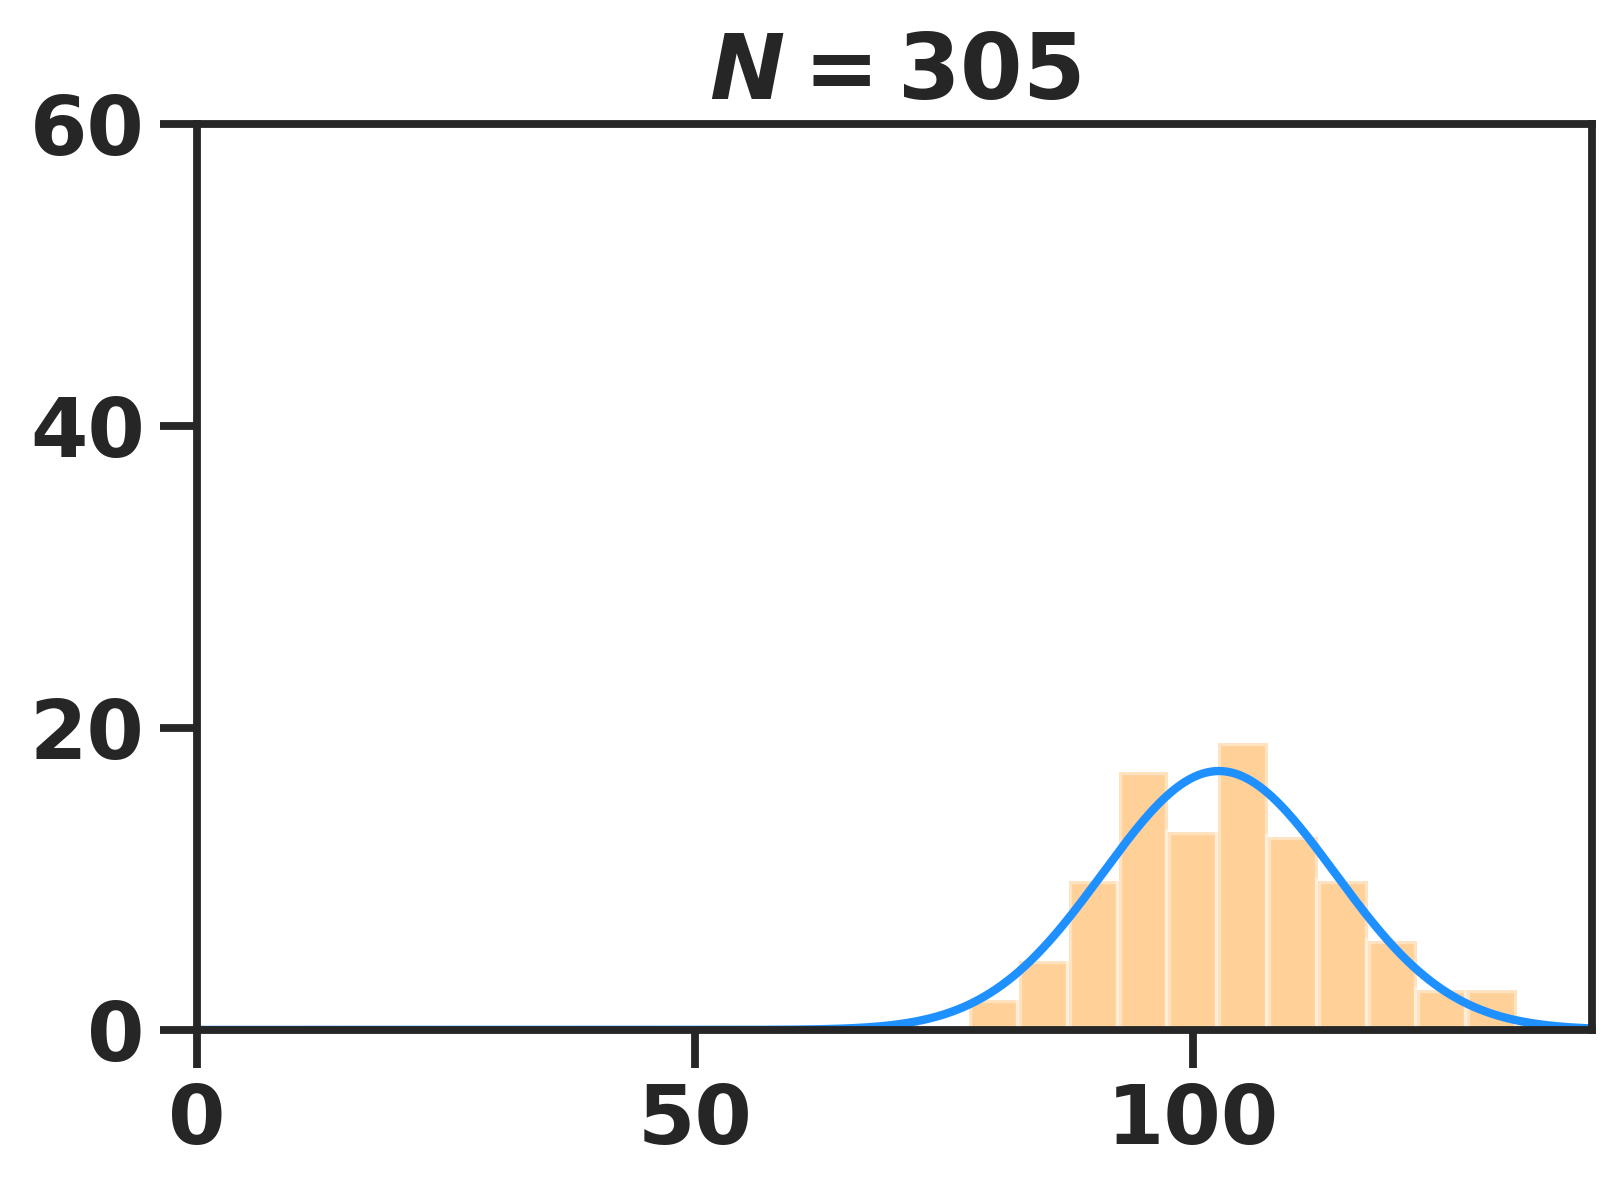

In [80]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x = np.linspace(0,140, 1000, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
#samples = dist_initial.rvs(1000)
sns.distplot(centers, bins=edges, kde=False, hist_kws={'weights':dist['initial'].to_numpy().copy()}, color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
#plt.hist(samples, density=True)
plt.xlim((0,140))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,60))
#plt.text(0.5, 20, "$\mu$ $\pm$ $\sigma$: \n{:.1f} $\pm$ {:.1f} nm".format(mu, sigma))
#plt.text(mu-40, dist['initial'].max()+5, "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue')
#plt.legend(loc='upper right')
plt.title("$N=305$")

In [81]:
freq = dist['laser_low'].to_numpy().copy()
#freq[centers > 75] *= 2

In [82]:
freq

array([ 0.19607843, 38.23529412, 20.98039216,  8.03921569,  5.68627451,
        2.15686275,  0.39215686,  0.        ,  0.19607843,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.78431373,
        0.98039216,  2.94117647,  3.7254902 ,  3.52941176,  2.94117647,
        3.7254902 ,  2.35294118,  1.76470588,  0.58823529,  0.39215686,
        0.19607843,  0.19607843,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [83]:
freq[centers > 60] = 0
freq /= freq.sum()
freq *= 100
rescale1_low = dist['laser_low'][centers < 60].max() / freq.max()

In [84]:
initial_guess = np.array([10, 1, 4]) 

In [85]:

# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_unimodal_ln, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

7.625945430372973 [1.95758747 0.72639739 5.6681887 ]


In [86]:
mu1, sigma1, shift = fit_parms[0], fit_parms[1], fit_parms[2]

In [87]:
freq = dist['laser_low'].to_numpy().copy()
#freq[centers > 75] *= 2

In [88]:
freq

array([ 0.19607843, 38.23529412, 20.98039216,  8.03921569,  5.68627451,
        2.15686275,  0.39215686,  0.        ,  0.19607843,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.78431373,
        0.98039216,  2.94117647,  3.7254902 ,  3.52941176,  2.94117647,
        3.7254902 ,  2.35294118,  1.76470588,  0.58823529,  0.39215686,
        0.19607843,  0.19607843,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [89]:
freq[centers < 60] = 0
freq /= freq.sum()
freq *= 100
rescale2_low = dist['laser_low'][centers > 60].max() / freq.max()

In [90]:
initial_guess = np.array([100, 10]) 

In [91]:

# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_unimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

36.791274436192566 [97.47636206 12.71058995]


In [92]:
mu2, sigma2 = fit_parms[0], fit_parms[1]

In [93]:
#dist_1 = norm(loc=mu1, scale=sigma1)
#dist_1 = lognorm(s,loc=loc, scale=scale)
dist_1_low = lognorm(sigma1,scale=np.exp(mu1), loc=shift)
mu1, sigma1 = dist_1_low.mean(), dist_1_low.std()
dist_2_low = norm(loc=mu2, scale=sigma2)

Text(0.5, 1.0, '$N=510$')

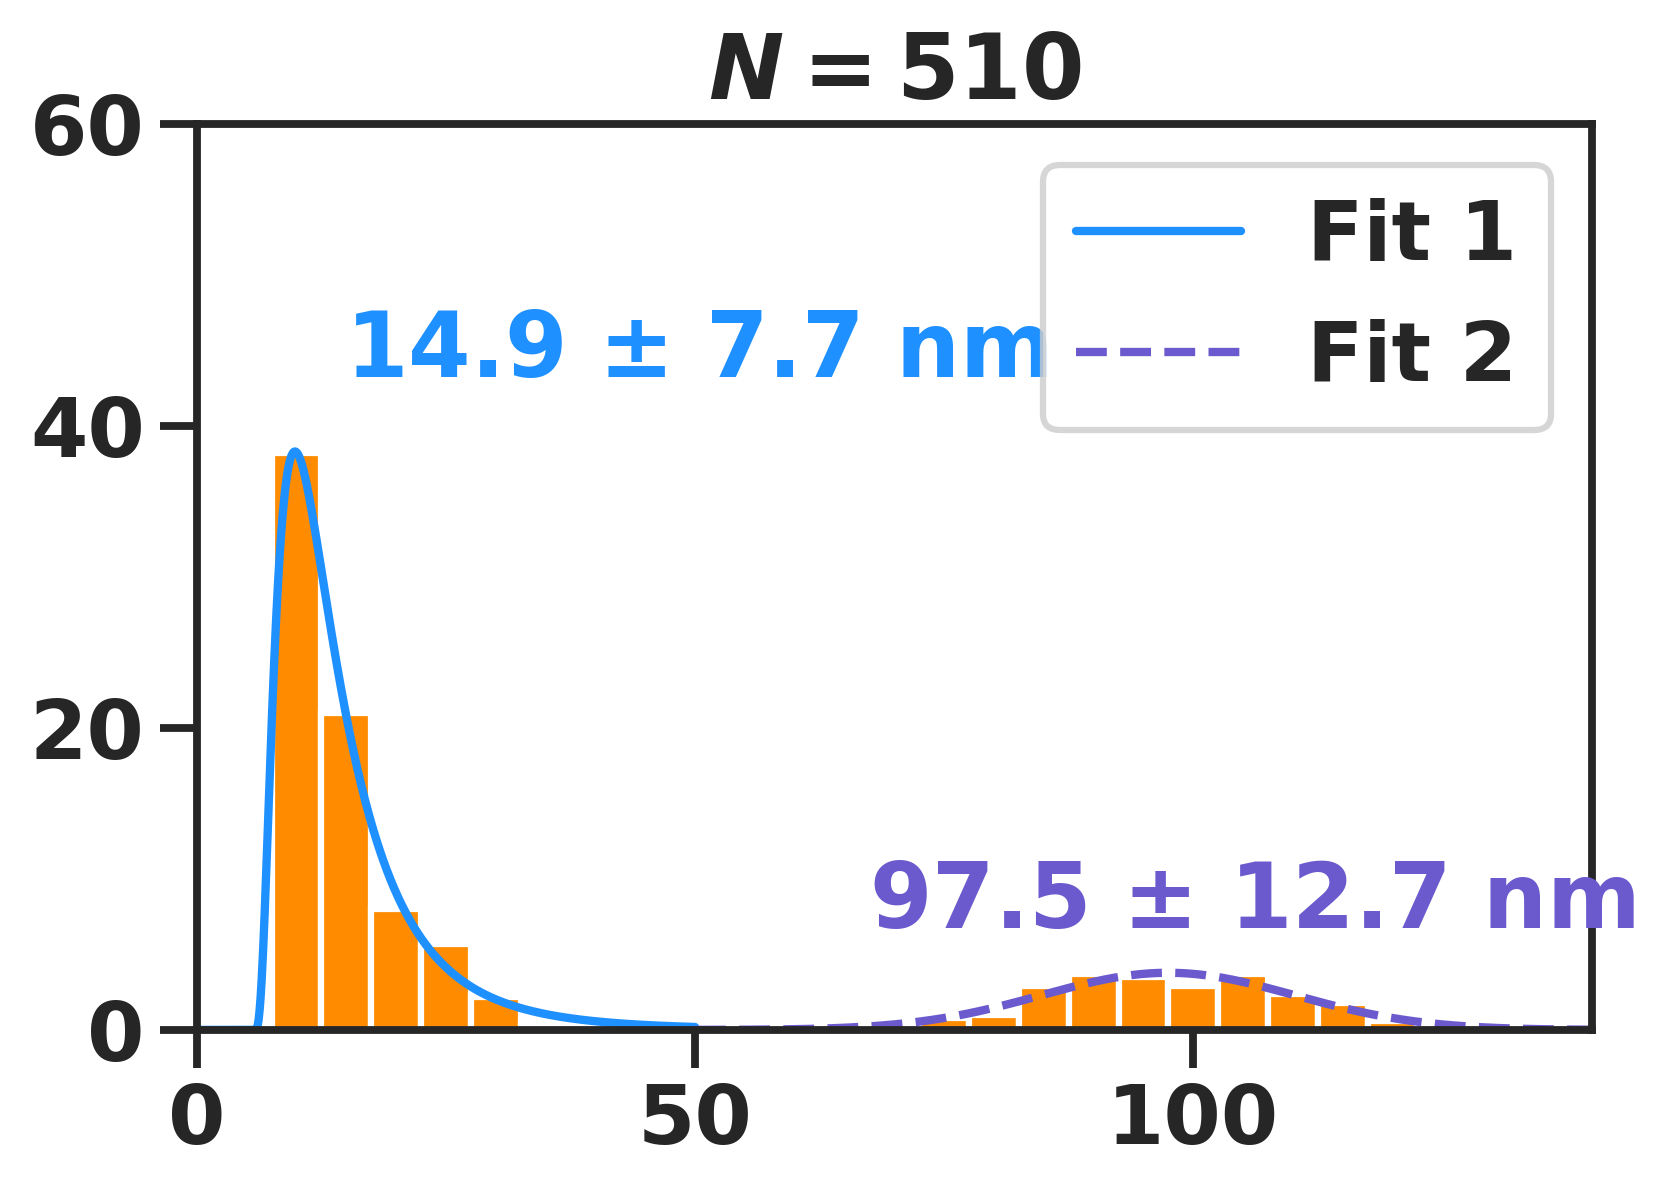

In [94]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x1 = np.linspace(0,50, 1000, endpoint=True)
x2 = np.linspace(50,140, 1000, endpoint=True)
#dx = x[1] - x[0]
#y = (a1*dist_1.pdf(x) + a2*dist_2.pdf(x)) * (edges[1]-edges[0]) * 100
y1 = (dist_1_low.pdf(x1) * bw * 100) * rescale1_low
y2 = (dist_2_low.pdf(x2) * bw * 100) * rescale2_low
np.savetxt('100nm_distfit_laser-low_mode1_x.txt', x1)
np.savetxt('100nm_distfit_laser-low_mode1_y.txt', y1)
np.savetxt('100nm_distfit_laser-low_mode2_x.txt', x2)
np.savetxt('100nm_distfit_laser-low_mode2_y.txt', y2)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x1, y1, color='dodgerblue', label='Fit 1', linewidth=2)
plt.plot(x2, y2, color='slateblue', label='Fit 2', linewidth=2, linestyle='--')
#plt.hist(samples, density=True)
plt.xlim((0,140))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,60))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1, dist['laser_low'][centers < 35].max()+5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2-30, dist['laser_low'][centers > 65].max()+3, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='slateblue')
plt.legend(loc='upper right')
plt.title("$N=510$")

Text(0.5, 1.0, '$N=510$')

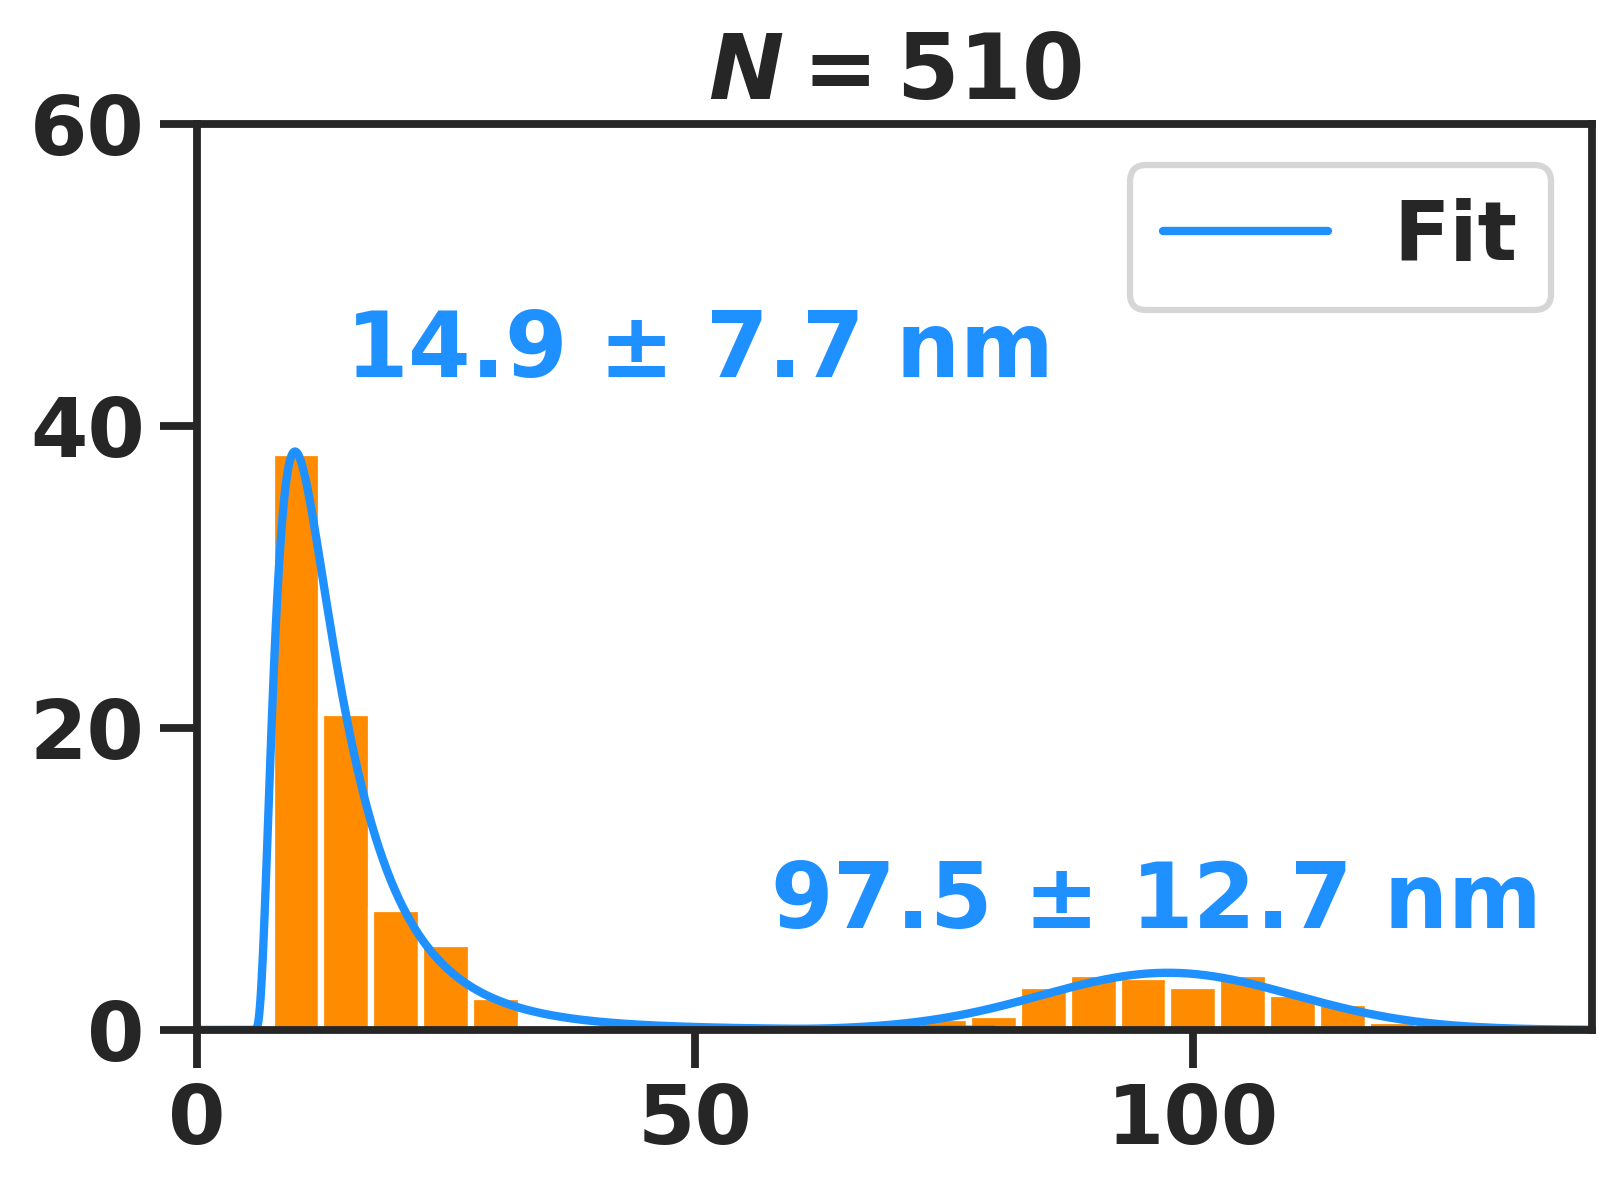

In [95]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x1 = np.linspace(0,80, 1000, endpoint=True)
x2 = np.linspace(50,140, 1000, endpoint=True)
#dx = x[1] - x[0]
#y = (a1*dist_1.pdf(x) + a2*dist_2.pdf(x)) * (edges[1]-edges[0]) * 100
y1 = (dist_1_low.pdf(x1) * bw * 100) * rescale1_low
y2 = (dist_2_low.pdf(x2) * bw * 100) * rescale2_low
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x1, y1, color='dodgerblue', label='Fit', linewidth=2)
plt.plot(x2, y2, color='dodgerblue', label=None, linewidth=2, linestyle='-')
#plt.hist(samples, density=True)
plt.xlim((0,140))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,60))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1, dist['laser_low'][centers < 35].max()+5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2-40, dist['laser_low'][centers > 65].max()+3, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=510$")

In [96]:
freq = dist['laser_high'].to_numpy().copy()
#freq[centers > 75] *= 2

In [97]:
freq

array([ 0.        , 22.88659794, 46.80412371, 13.40206186,  5.77319588,
        3.91752577,  1.2371134 ,  0.20618557,  0.20618557,  0.20618557,
        0.41237113,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.6185567 ,  1.03092784,  0.6185567 ,  0.82474227,
        0.82474227,  0.41237113,  0.20618557,  0.        ,  0.41237113,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [98]:
freq[centers > 60] = 0
freq /= freq.sum()
freq *= 100
rescale1_high = dist['laser_high'][centers < 60].max() / freq.max()

In [99]:
initial_guess = np.array([10, 1, 4]) 

In [100]:

# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_unimodal_ln, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

11.92360040572791 [1.81607283 0.58819149 8.11535358]


In [101]:
mu1, sigma1, shift = fit_parms[0], fit_parms[1], fit_parms[2]

In [102]:
freq = dist['laser_high'].to_numpy().copy()
#freq[centers > 75] *= 2

In [103]:
freq

array([ 0.        , 22.88659794, 46.80412371, 13.40206186,  5.77319588,
        3.91752577,  1.2371134 ,  0.20618557,  0.20618557,  0.20618557,
        0.41237113,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.6185567 ,  1.03092784,  0.6185567 ,  0.82474227,
        0.82474227,  0.41237113,  0.20618557,  0.        ,  0.41237113,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [104]:
freq[centers < 60] = 0
freq /= freq.sum()
freq *= 100
rescale2_high = dist['laser_high'][centers > 60].max() / freq.max()

In [105]:
initial_guess = np.array([100, 10]) 

In [106]:

# Minimize using the minimize function from scipy with Nelder-Mead method.
# opt_res stands for Optimizer Result
opt_res = minimize(cost_unimodal, initial_guess, method='Nelder-Mead')
# run it
fit_parms = opt_res.x # index 0 is E, index 1 is gamma
fit_cost = opt_res.fun
print(fit_cost, fit_parms)

178.96060598755082 [97.15097531 10.83406936]


In [107]:
mu2, sigma2 = fit_parms[0], fit_parms[1]

In [108]:
#dist_1 = norm(loc=mu1, scale=sigma1)
#dist_1 = lognorm(s,loc=loc, scale=scale)
dist_1_high = lognorm(sigma1,scale=np.exp(mu1), loc=shift)
mu1, sigma1 = dist_1_high.mean(), dist_1_high.std()
dist_2_high = norm(loc=mu2, scale=sigma2)

Text(0.5, 1.0, '$N=485$')

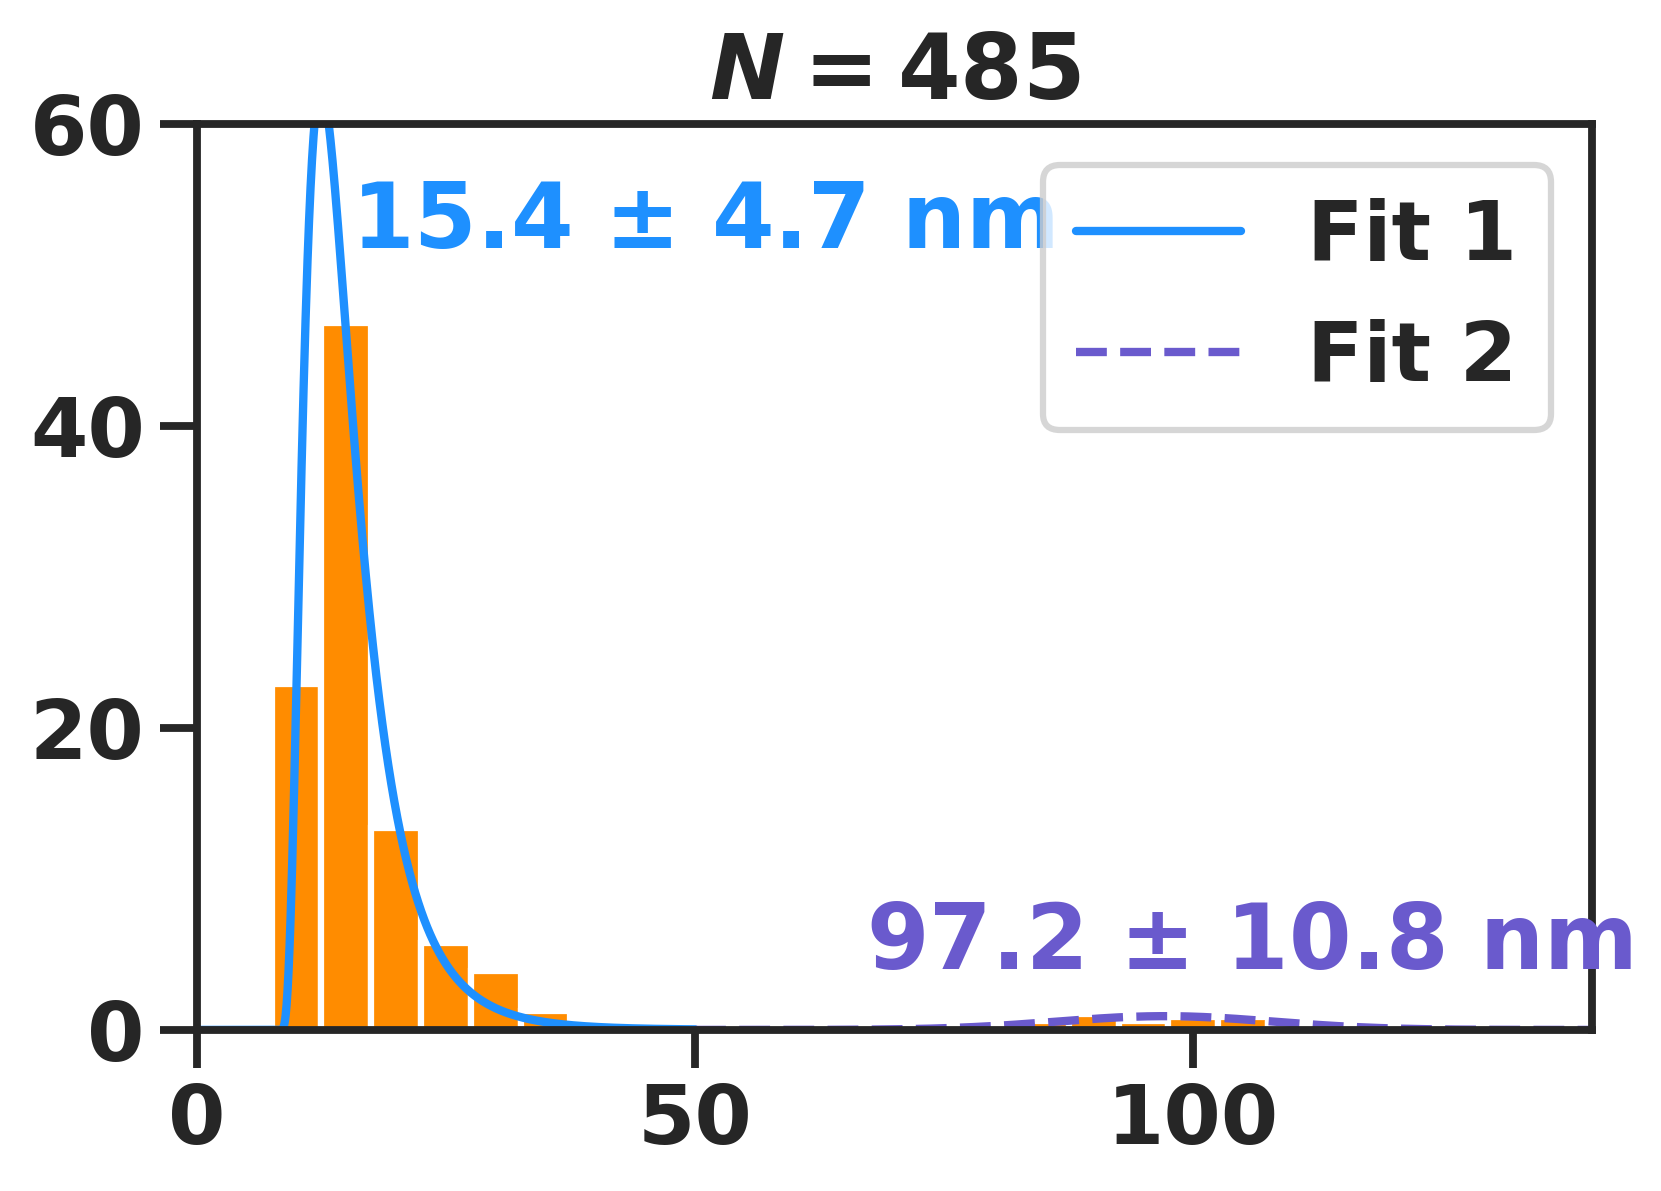

In [109]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x1 = np.linspace(0,50, 1000, endpoint=True)
x2 = np.linspace(50,140, 1000, endpoint=True)
#dx = x[1] - x[0]
#y = (a1*dist_1.pdf(x) + a2*dist_2.pdf(x)) * (edges[1]-edges[0]) * 100
y1 = (dist_1_high.pdf(x1) * bw * 100) * rescale1_high
y2 = (dist_2_high.pdf(x2) * bw * 100) * rescale2_high
np.savetxt('100nm_distfit_laser-high_mode1_x.txt', x1)
np.savetxt('100nm_distfit_laser-high_mode1_y.txt', y1)
np.savetxt('100nm_distfit_laser-high_mode2_x.txt', x2)
np.savetxt('100nm_distfit_laser-high_mode2_y.txt', y2)
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x1, y1, color='dodgerblue', label='Fit 1', linewidth=2)
plt.plot(x2, y2, color='slateblue', label='Fit 2', linewidth=2, linestyle='--')
#plt.hist(samples, density=True)
plt.xlim((0,140))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,60))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1, dist['laser_high'][centers < 35].max()+5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2-30, dist['laser_high'][centers > 65].max()+3, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='slateblue')
plt.legend(loc='upper right')
plt.title("$N=485$")

Text(0.5, 1.0, '$N=485$')

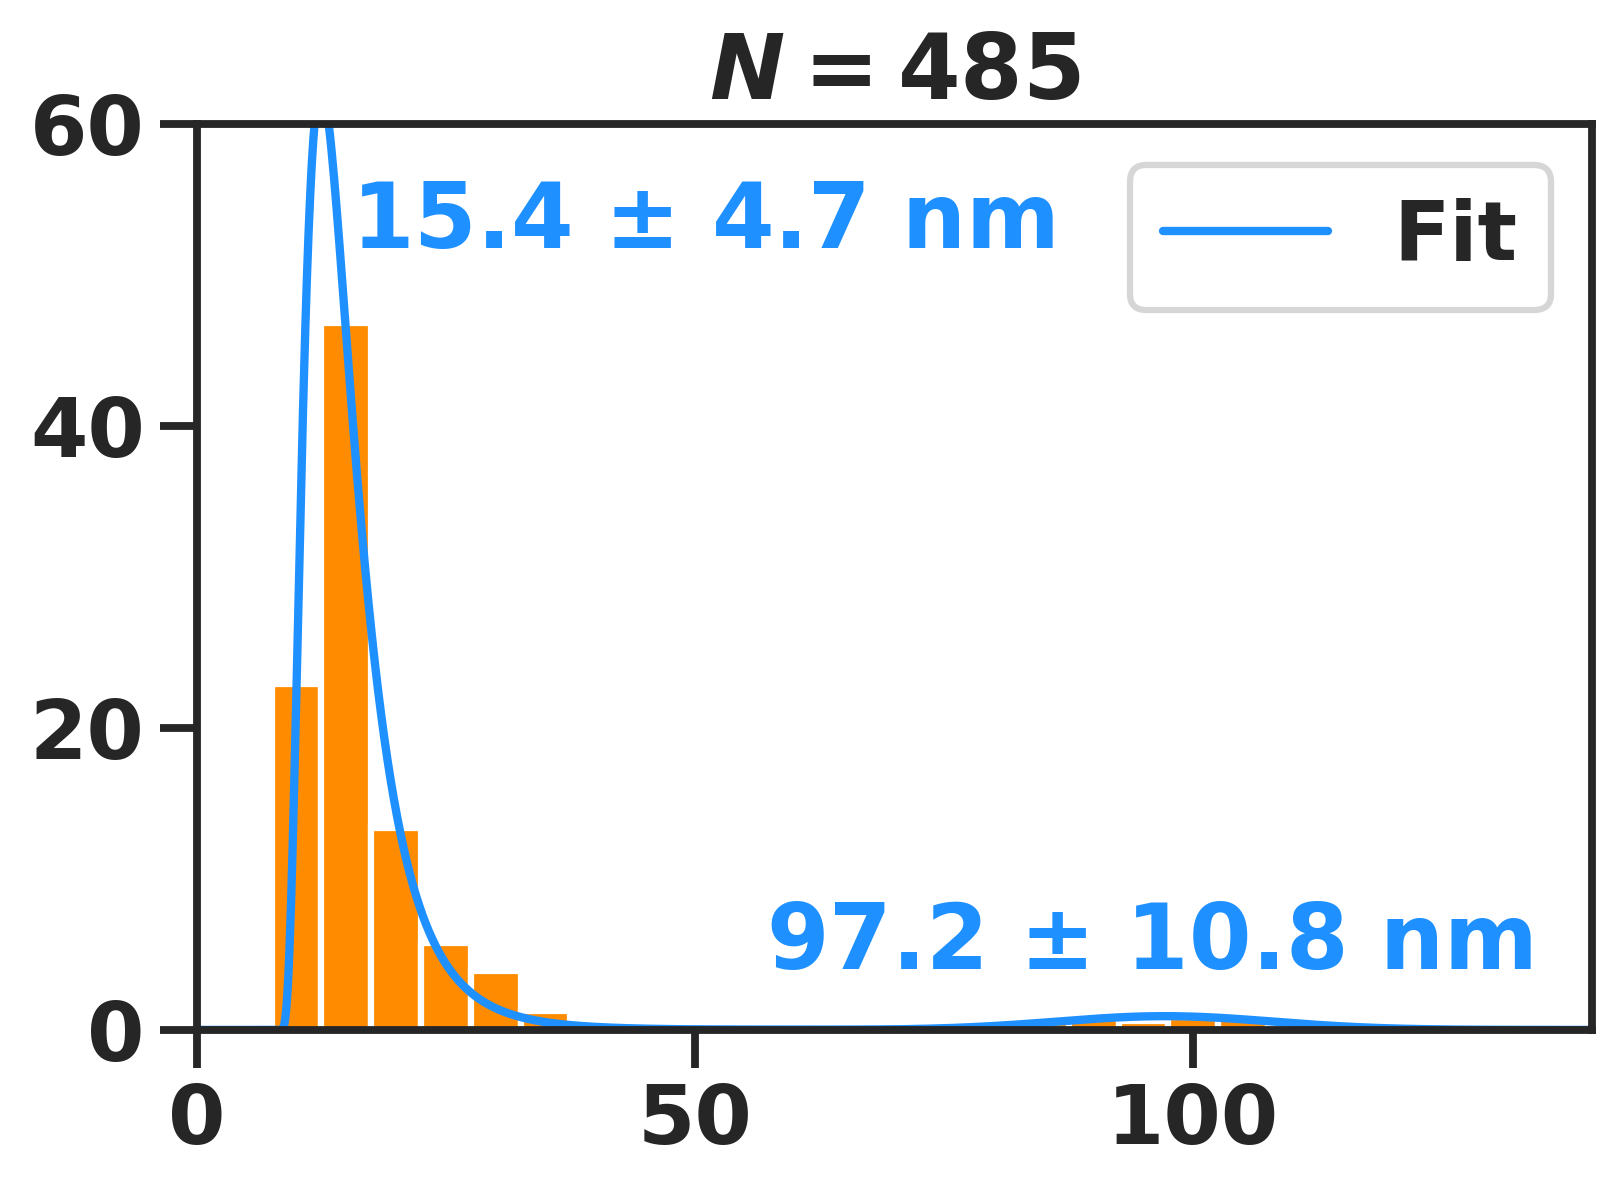

In [110]:
#counts, _edges = np.histogram(sample_sizes, bins=edges)
#freq = 100 * counts / len(sample_sizes)

x1 = np.linspace(0,80, 1000, endpoint=True)
x2 = np.linspace(50,140, 1000, endpoint=True)
#dx = x[1] - x[0]
#y = (a1*dist_1.pdf(x) + a2*dist_2.pdf(x)) * (edges[1]-edges[0]) * 100
y1 = (dist_1_high.pdf(x1) * bw * 100) * rescale1_high
y2 = (dist_2_high.pdf(x2) * bw * 100) * rescale2_high
#samples = dist_initial.rvs(1000)
plt.hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None)
#plt.hist(centers, bins=edges, weights=freq, color='b', alpha=0.5)
#plt.plot(centers, freq)
plt.plot(x1, y1, color='dodgerblue', label='Fit', linewidth=2)
plt.plot(x2, y2, color='dodgerblue', label=None, linewidth=2, linestyle='-')
#plt.hist(samples, density=True)
plt.xlim((0,140))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
plt.ylim((0,60))
#plt.text(1, 15, "$\mu_1$ $\pm$ $\sigma_1$: \n{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1))
#plt.text(6, 15, "$\mu_2$ $\pm$ $\sigma_2$: \n{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2))
plt.text(mu1, dist['laser_high'][centers < 35].max()+5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
plt.text(mu2-40, dist['laser_high'][centers > 65].max()+3, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
plt.legend(loc='upper right')
plt.title("$N=485$")

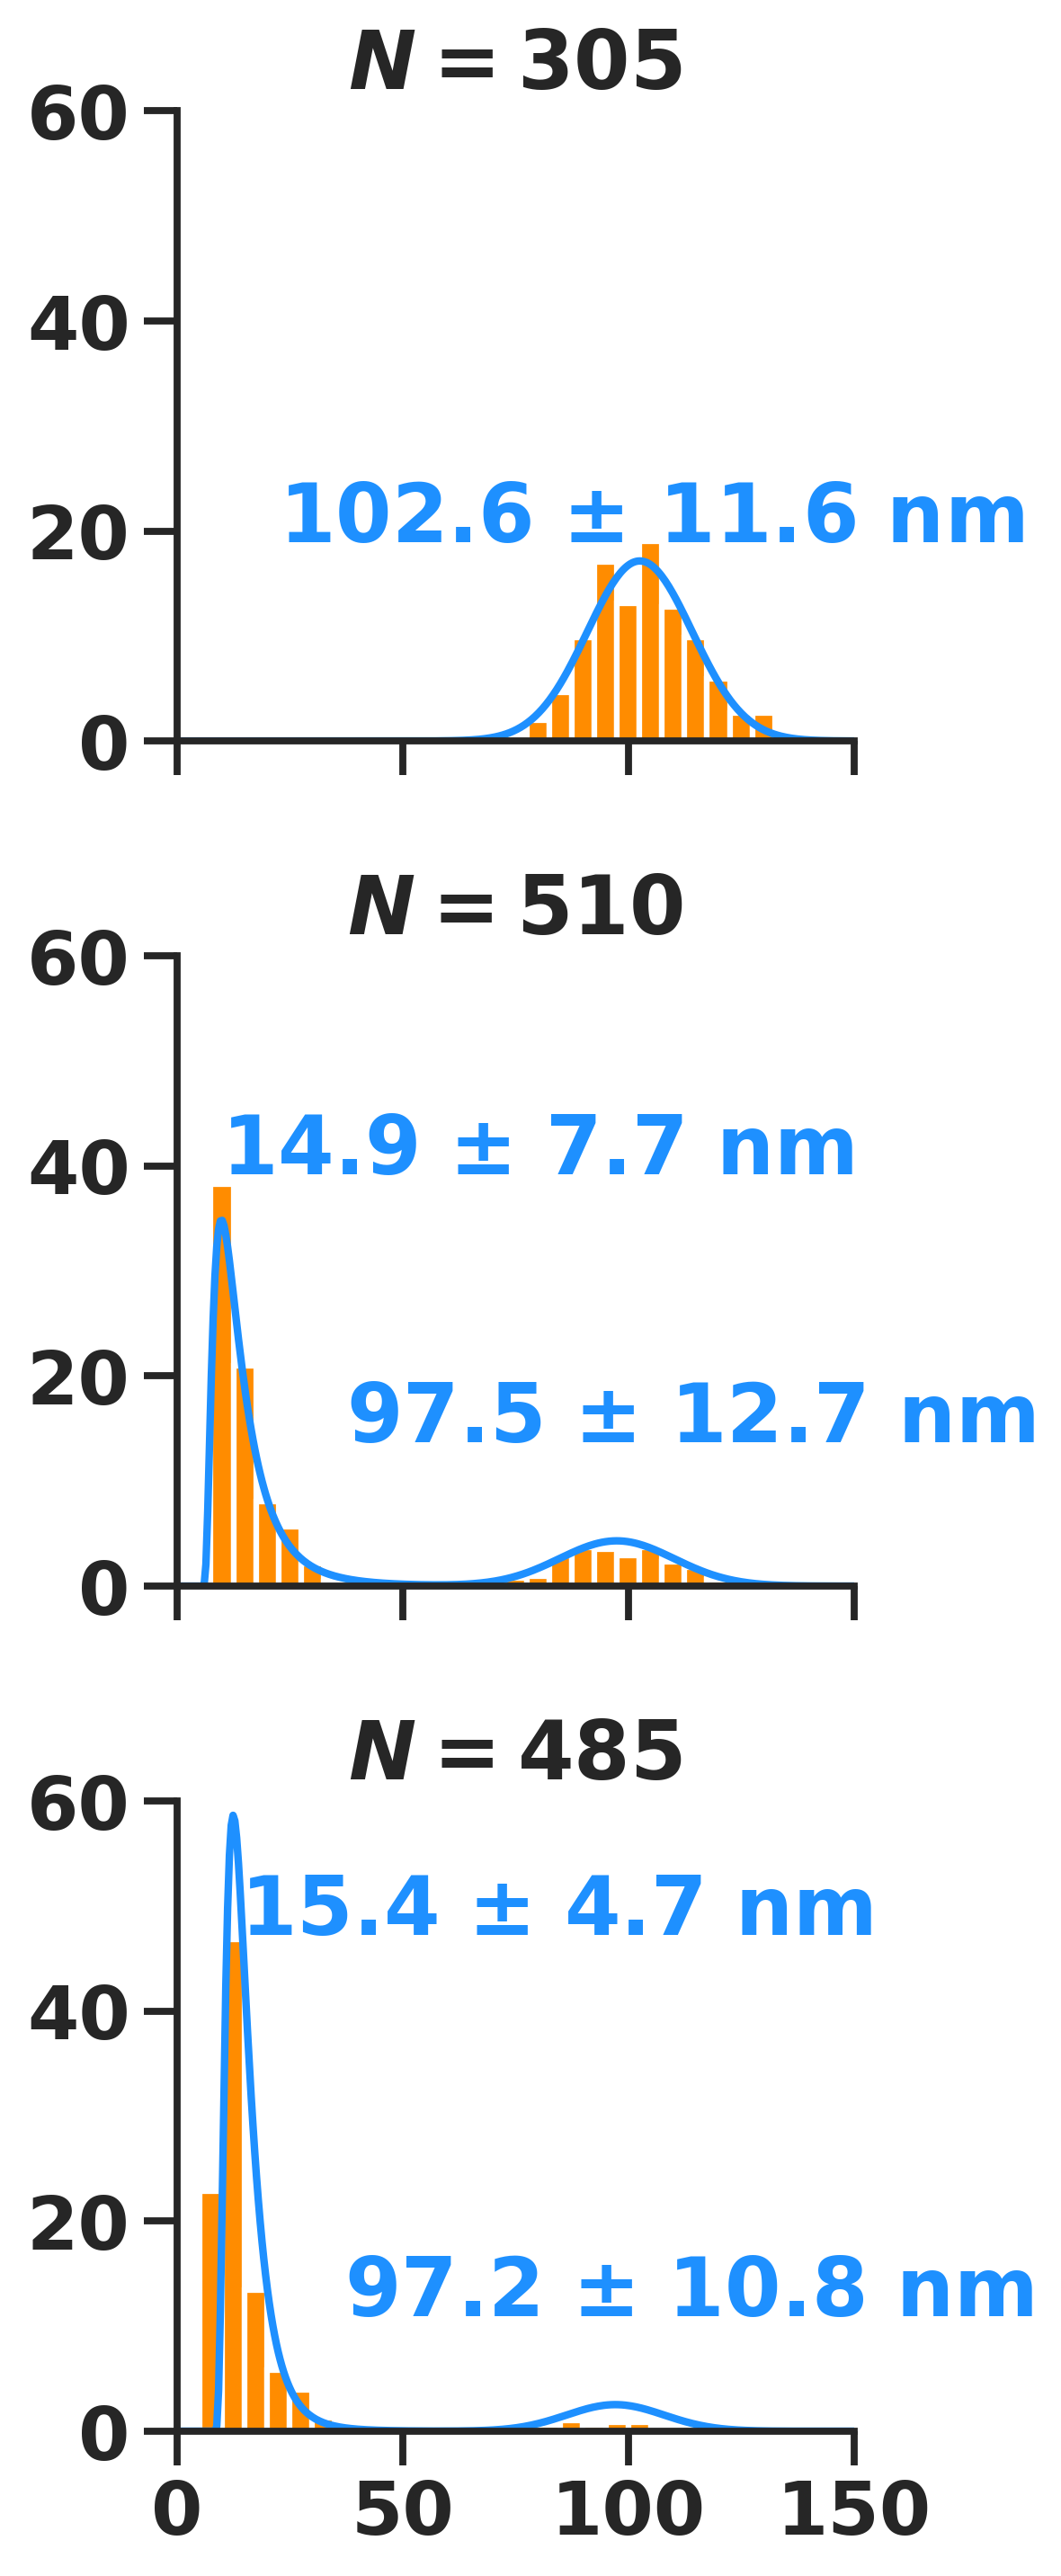

In [111]:
# Generate the plot 
rows = 3
columns = 1

f, axes = plt.subplots(rows, columns, figsize=(4, 10), sharex=True, sharey=False)

x = np.linspace(0,200, 500, endpoint=True)
dx = x[1] - x[0]
y = dist_initial.pdf(x) * (edges[1]-edges[0]) * 100
mu, sigma = dist_initial.mean(), dist_initial.std()

axes[0].hist(centers, bins=edges, weights=dist['initial'], color='darkorange', label=None, rwidth=1)
axes[0].plot(x, y, color='dodgerblue', label='Fit', linestyle='-', linewidth=2)
axes[0].text(mu-80, dist['initial'].max(), "{:.1f} $\pm$ {:.1f} nm".format(mu, sigma), color='dodgerblue', fontweight='bold')
#axes[0].legend(loc='upper right')
axes[0].set_title("$N=305$")
axes[0].set_xticks(ticks=np.arange(0,200, 50))
axes[0].set_xlim((0,150))
axes[0].set_ylim((0,60))
axes[0].set_yticks(ticks=np.arange(0,80, 20))

x = np.linspace(0,200, 500, endpoint=True)
dx = x[1] - x[0]
y = (a1_low*dist_1_low.pdf(x) + a2_low*dist_2_low.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_low.mean(), dist_1_low.std()
mu2, sigma2 = dist_2_low.mean(), dist_2_low.std()
axes[1].hist(centers, bins=edges, weights=dist['laser_low'], color='darkorange', label=None)
axes[1].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[1].text(mu1-5, dist['laser_low'][centers < 50].max()+1, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[1].text(mu2-60, dist['laser_low'][centers > 50].max()+10, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
#axes[1].legend(loc='upper right')
axes[1].set_title("$N=510$")
axes[1].set_xticks(ticks=np.arange(0,200, 50))
axes[1].set_xlim((0,150))
axes[1].set_ylim((0,60))
axes[1].set_yticks(ticks=np.arange(0,80, 20))

x = np.linspace(0,200, 500, endpoint=True)
#x = centers.copy()
dx = x[1] - x[0]
y = (a1_high*dist_1_high.pdf(x) + a2_high*dist_2_high.pdf(x)) * (edges[1]-edges[0]) * 100
mu1, sigma1 = dist_1_high.mean(), dist_1_high.std()
mu2, sigma2 = dist_2_high.mean(), dist_2_high.std()
axes[2].hist(centers, bins=edges, weights=dist['laser_high'], color='darkorange', label=None, align='left', histtype='bar', rwidth=2)
axes[2].plot(x, y, color='dodgerblue', label='Fit', linewidth=2)
axes[2].text(mu1-1.5, dist['laser_high'][centers < 50].max()+0.5, "{:.1f} $\pm$ {:.1f} nm".format(mu1, sigma1), color='dodgerblue')
axes[2].text(mu2-60, dist['laser_high'][centers > 50].max()+10, "{:.1f} $\pm$ {:.1f} nm".format(mu2, sigma2), color='dodgerblue')
#axes[2].legend(loc='upper right')
axes[2].set_title("$N=485$")
axes[2].set_xticks(ticks=np.arange(0,200, 50))
axes[2].set_xlim((0,150))
axes[2].set_ylim((0,60))
axes[2].set_yticks(ticks=np.arange(0,80, 20))

#plt.xlim((0,25))
#plt.ylabel("Frequency (%)")
#plt.xlabel("Size (nm)")
#plt.ylim((0,25))
sns.despine(bottom = False, left = False)
#f.subplots_adjust(wspace=0.25)
f.subplots_adjust(hspace=0.5)
#f.supxlabel("Frequency (%)")
#f.supylabel("Size (nm)")
plt.tight_layout()
plt.savefig('100nm_stacked.pdf')